In [24]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

sb.set()

In [25]:
b = pd.read_csv('data 2.csv')

In [26]:
# Drop unnecessary columns
b = b.drop(columns=['id', 'Unnamed: 32'])

# Replace diagnosis with numerals
b['diagnosis'] = b['diagnosis'].replace(["M", "B"], [1, 0])

# Split the data into features and target variable
y = b["diagnosis"]
X = b.drop("diagnosis", axis=1)

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

### Binary classification is a supervised learning algorithm. It helps to classify each data point into one of two classes. For our dataset, the 2 categories are 1 or 0 (ie. malignant cancer or benign cancer respectively), based on the x variables (ie. radius, volume, area etc). 

# Using K-Fold for Binary Classification Tree

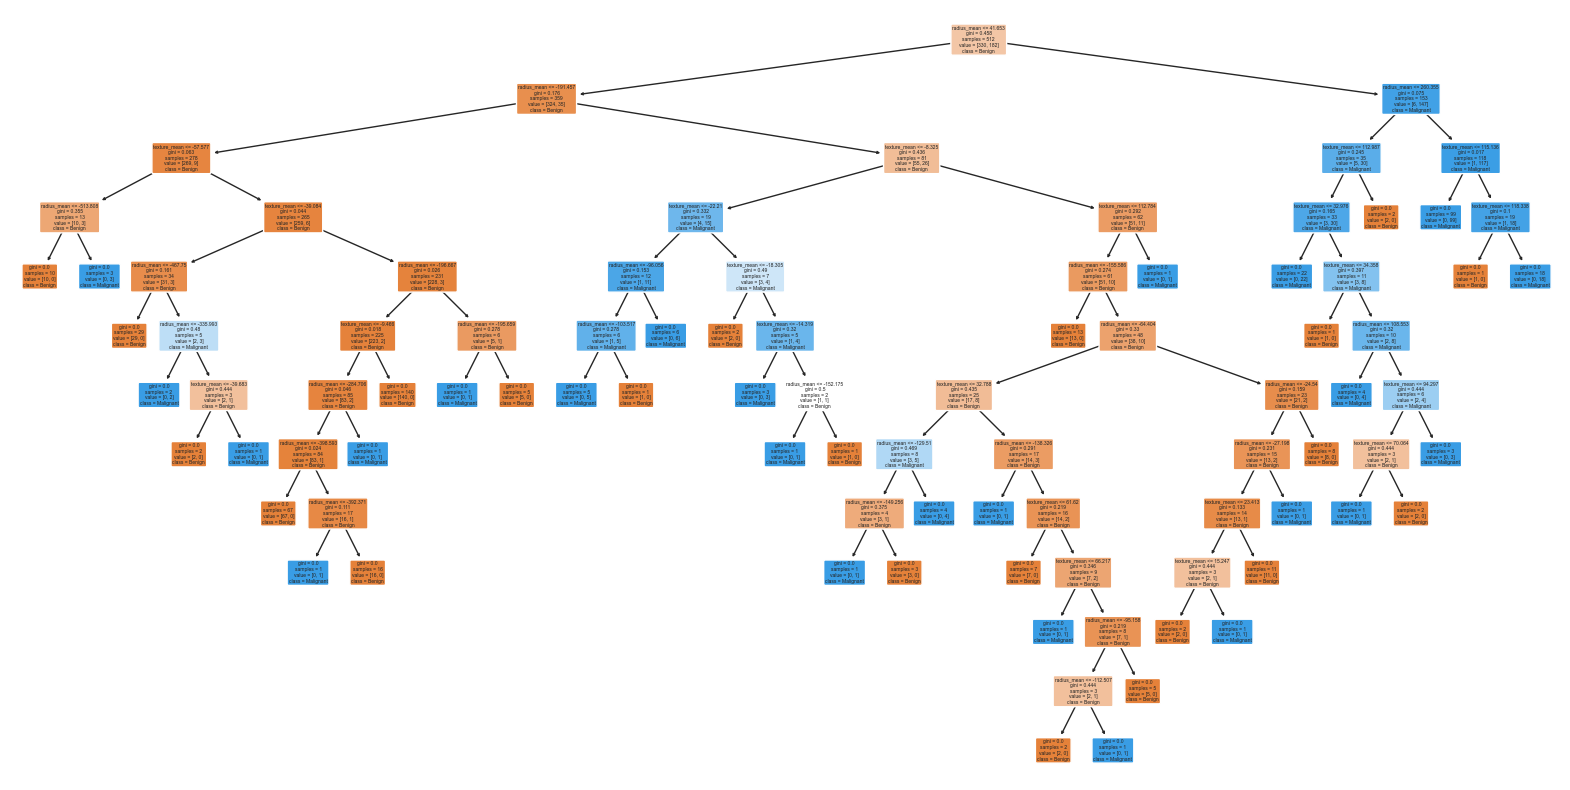

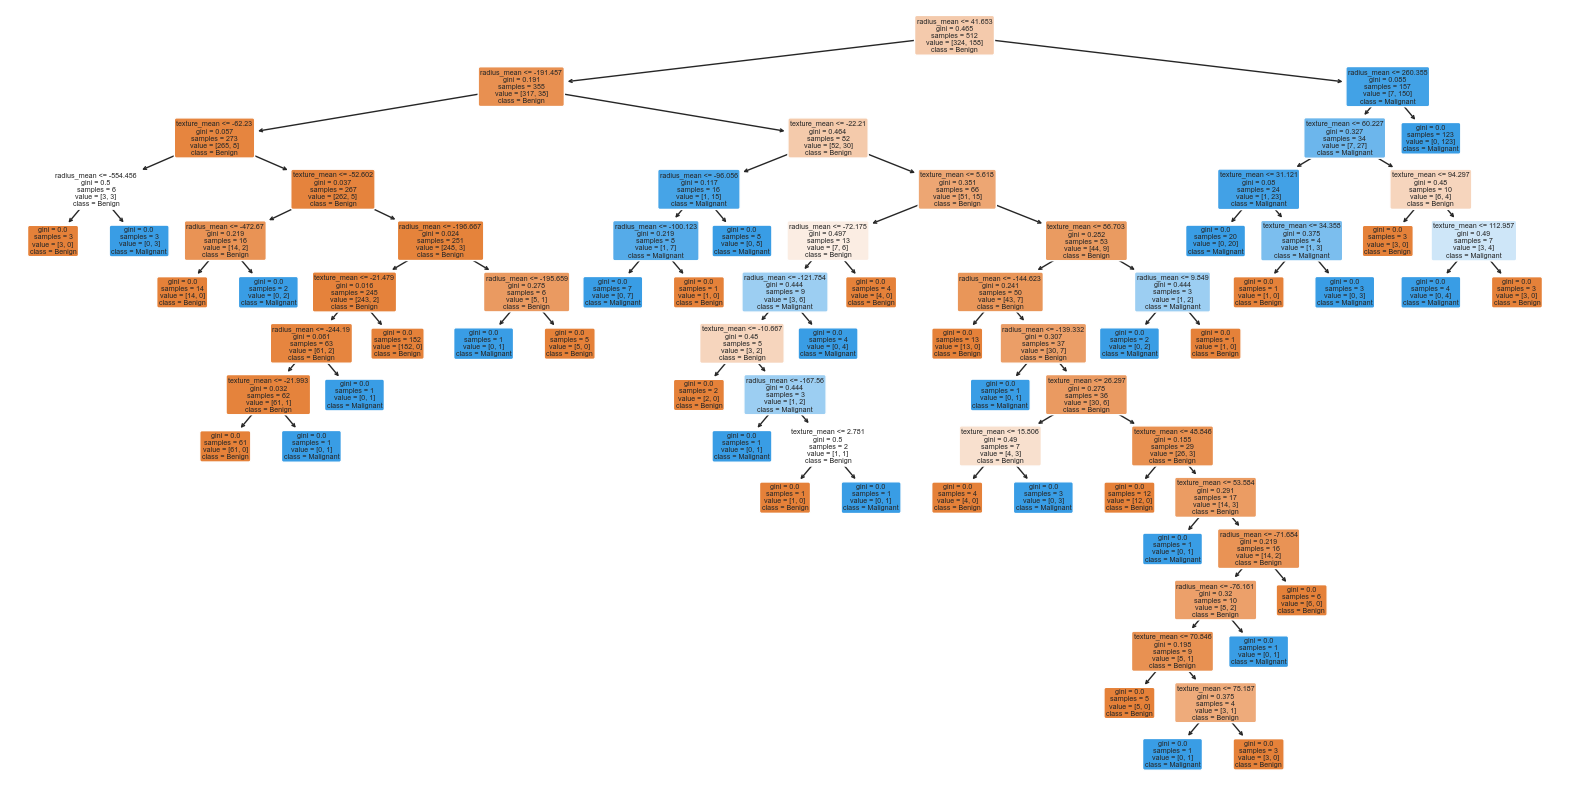

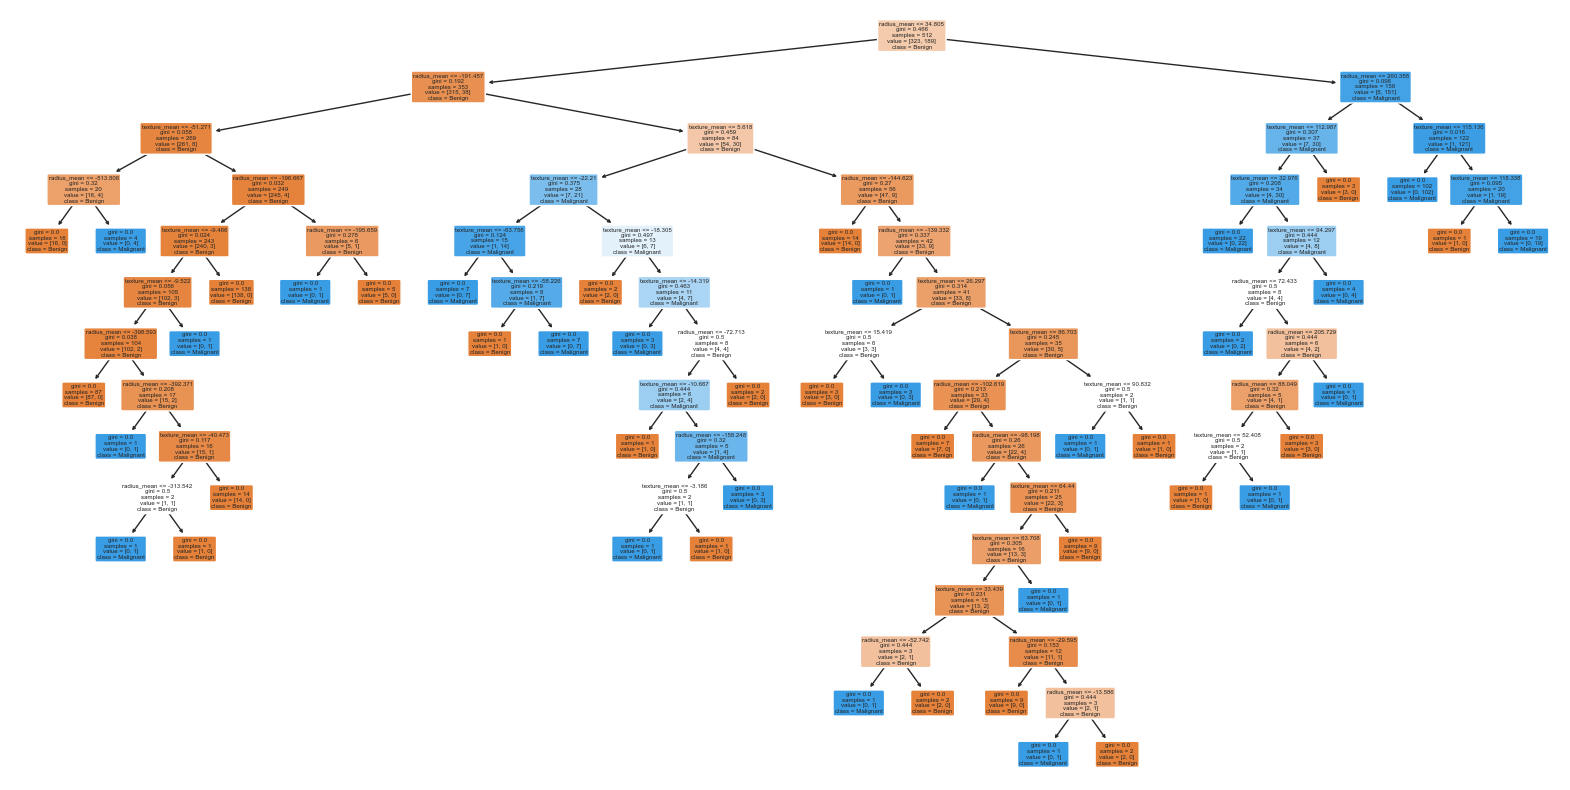

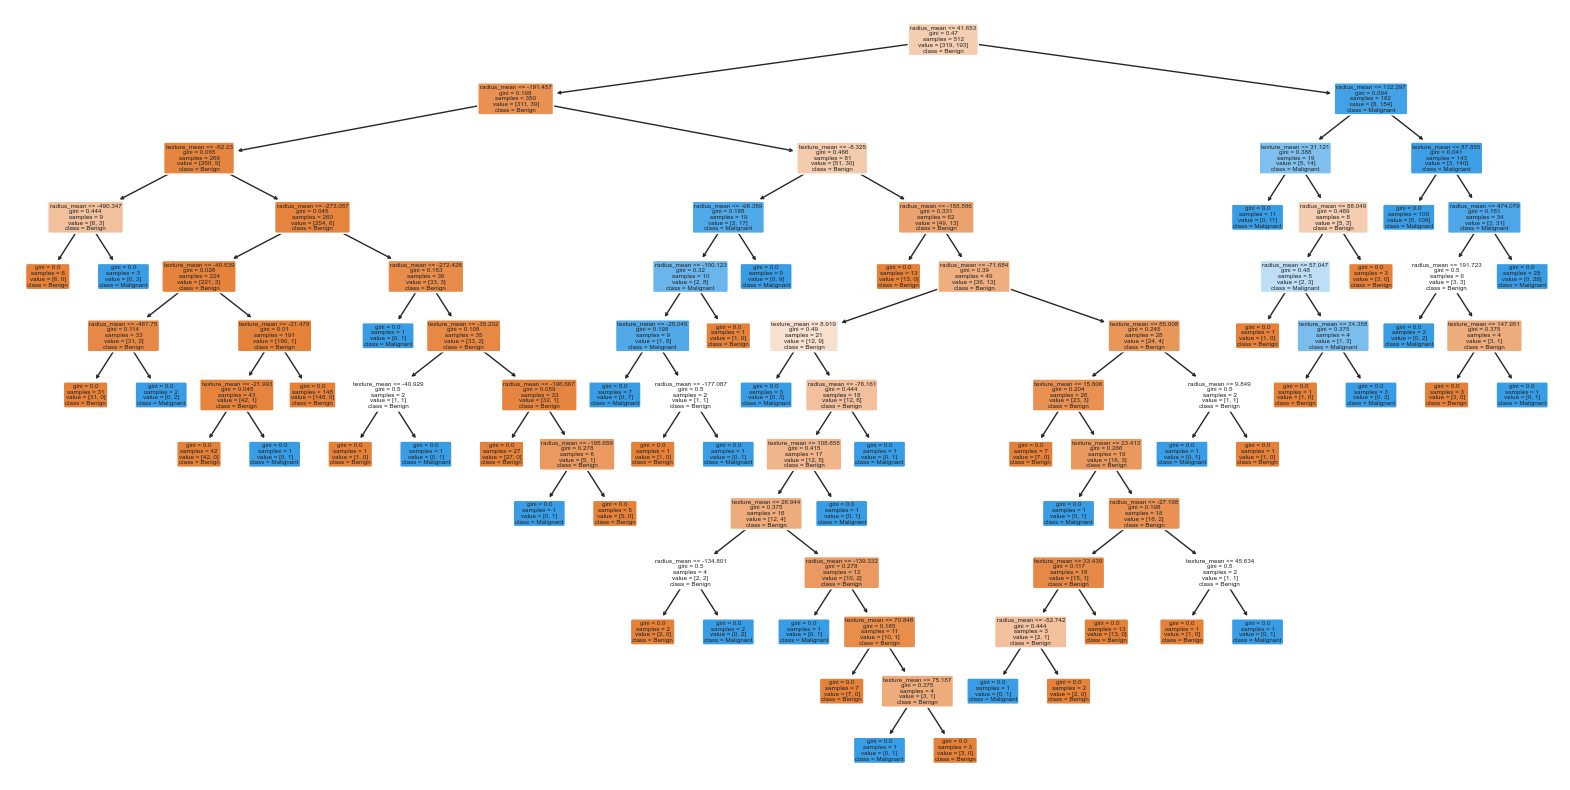

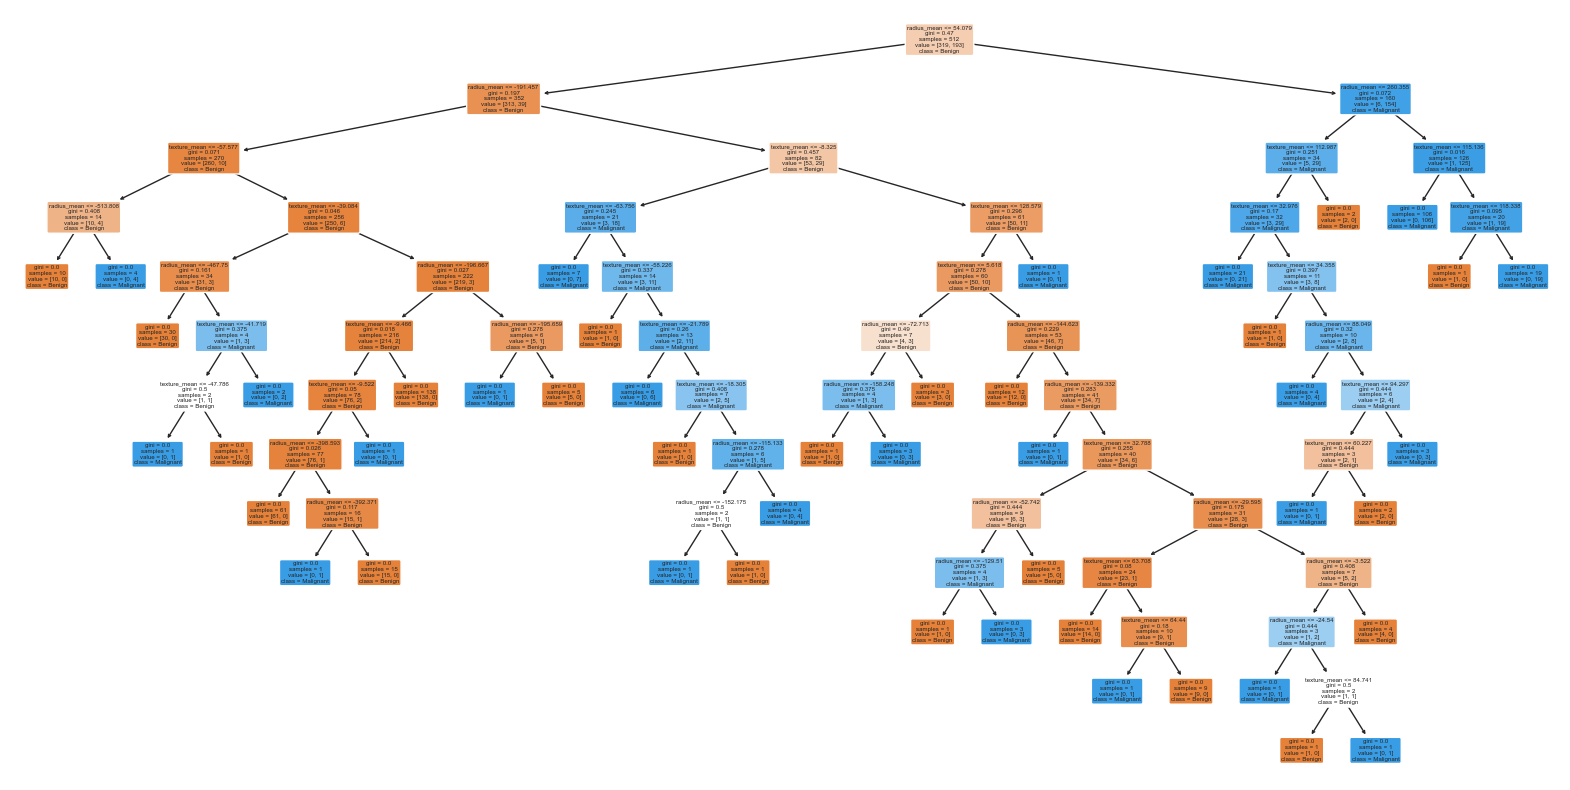

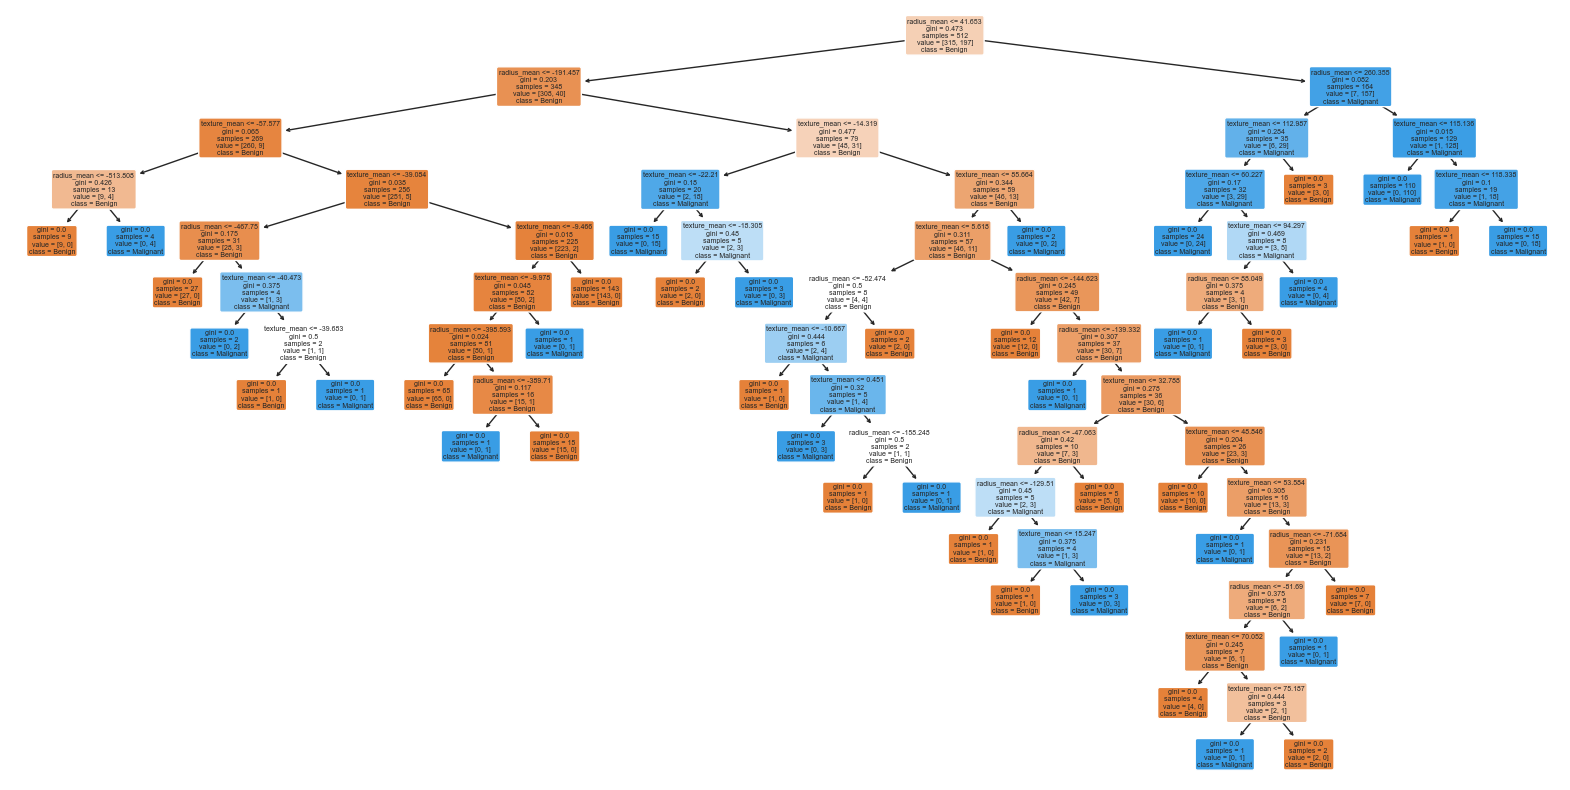

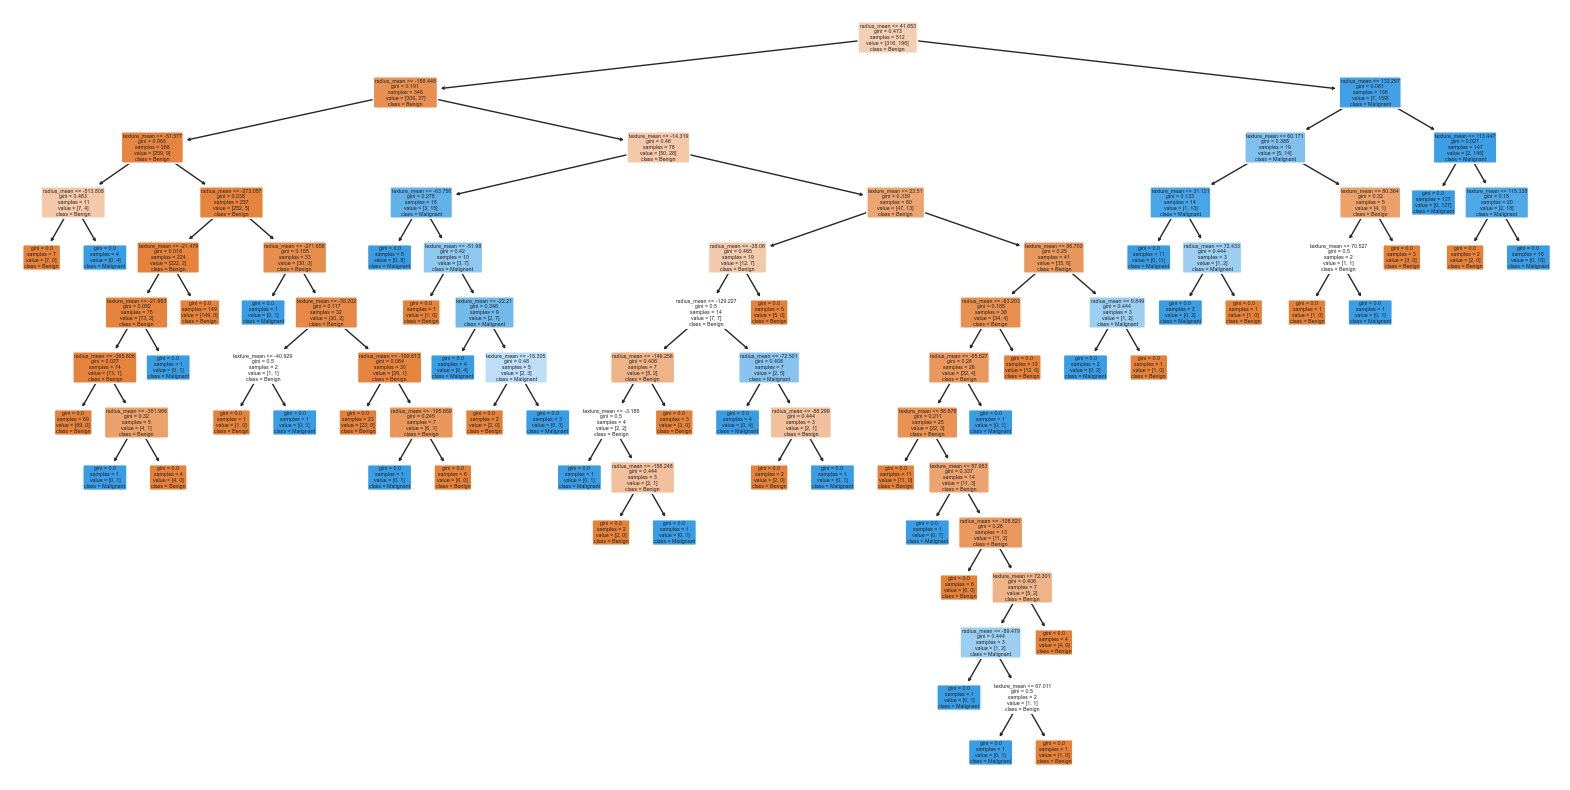

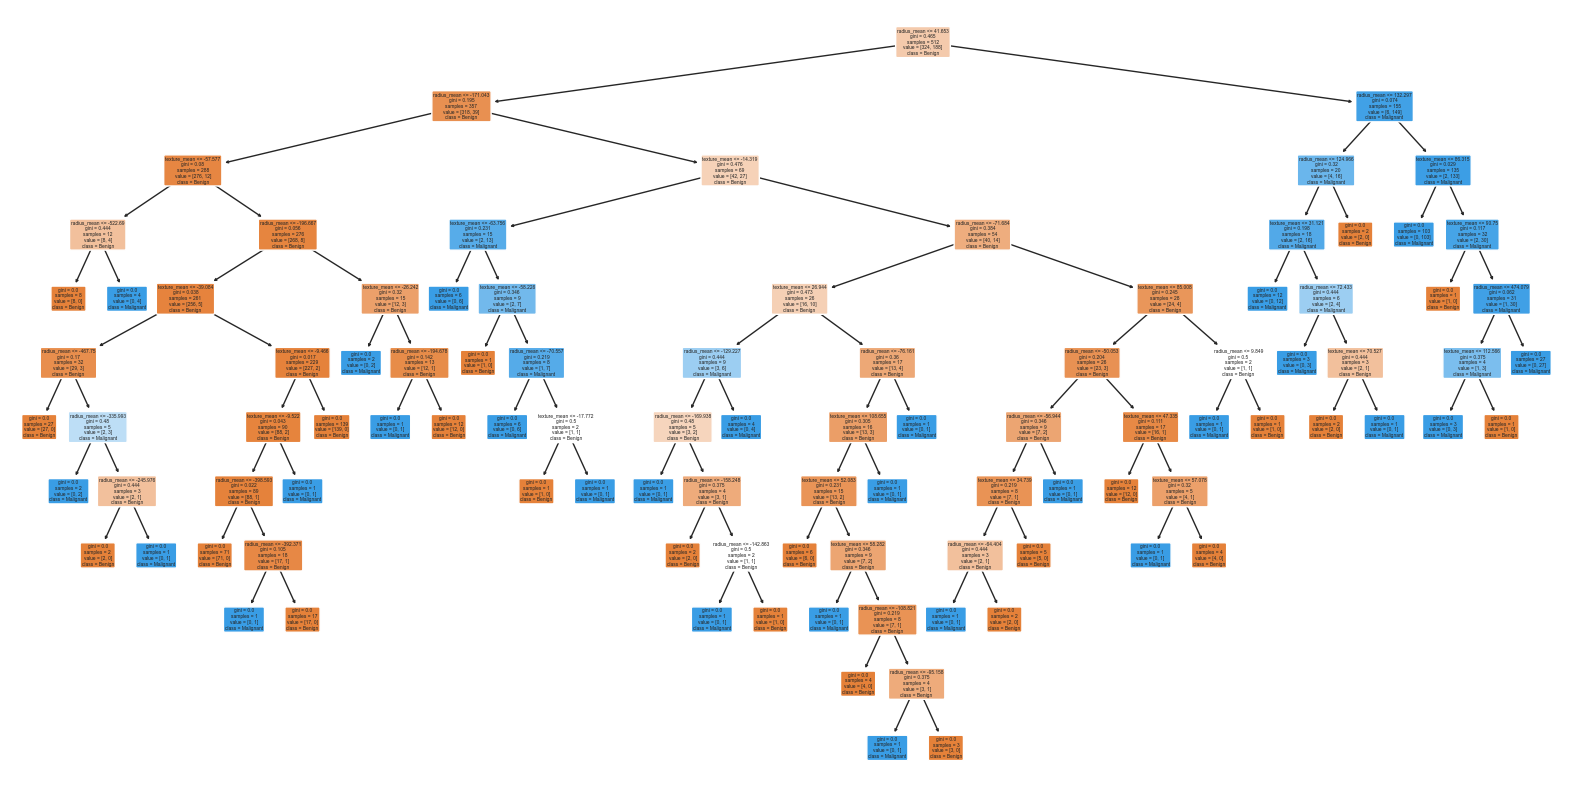

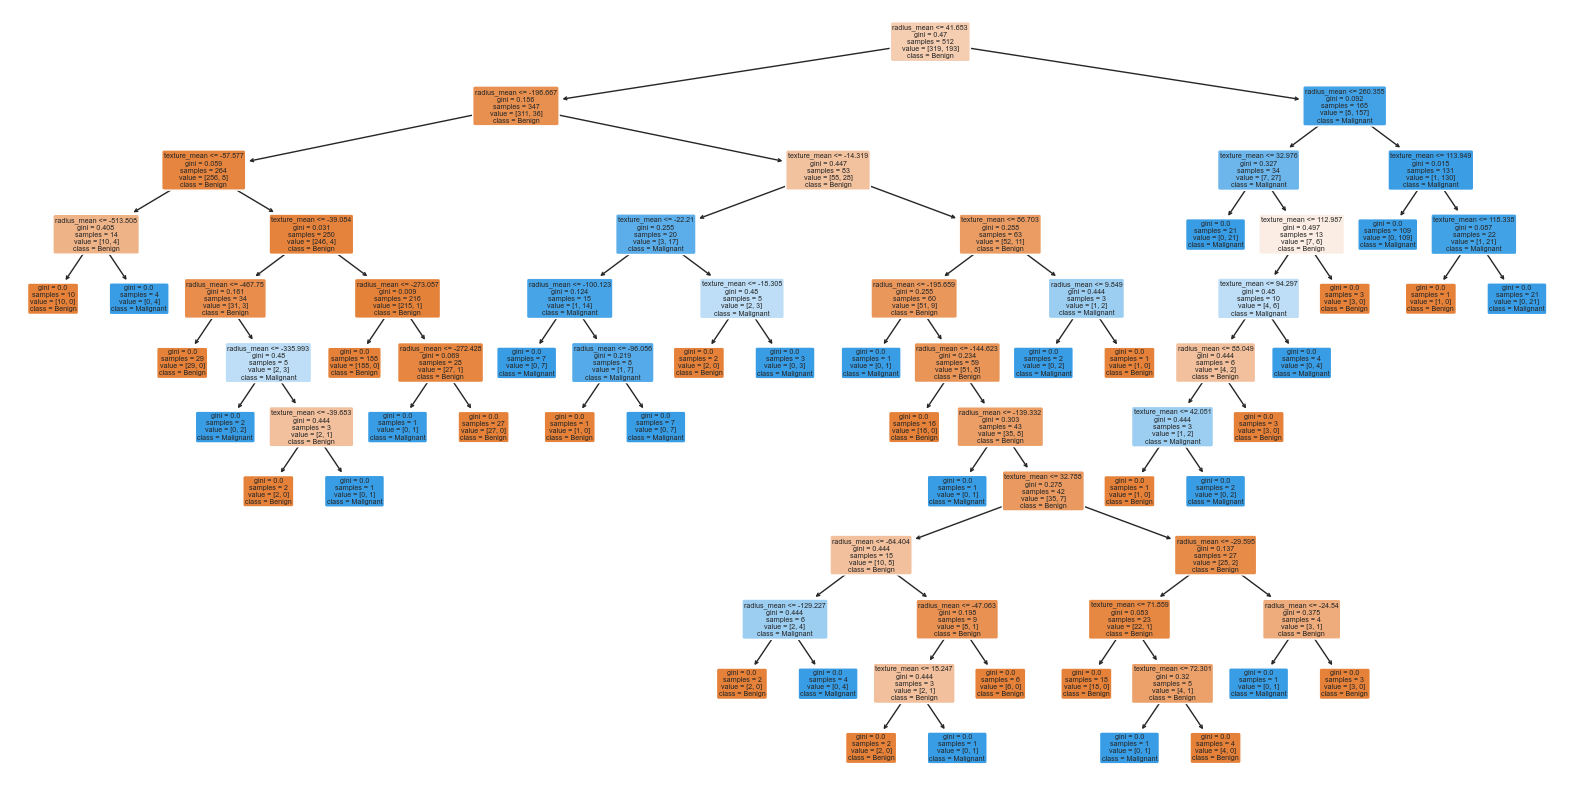

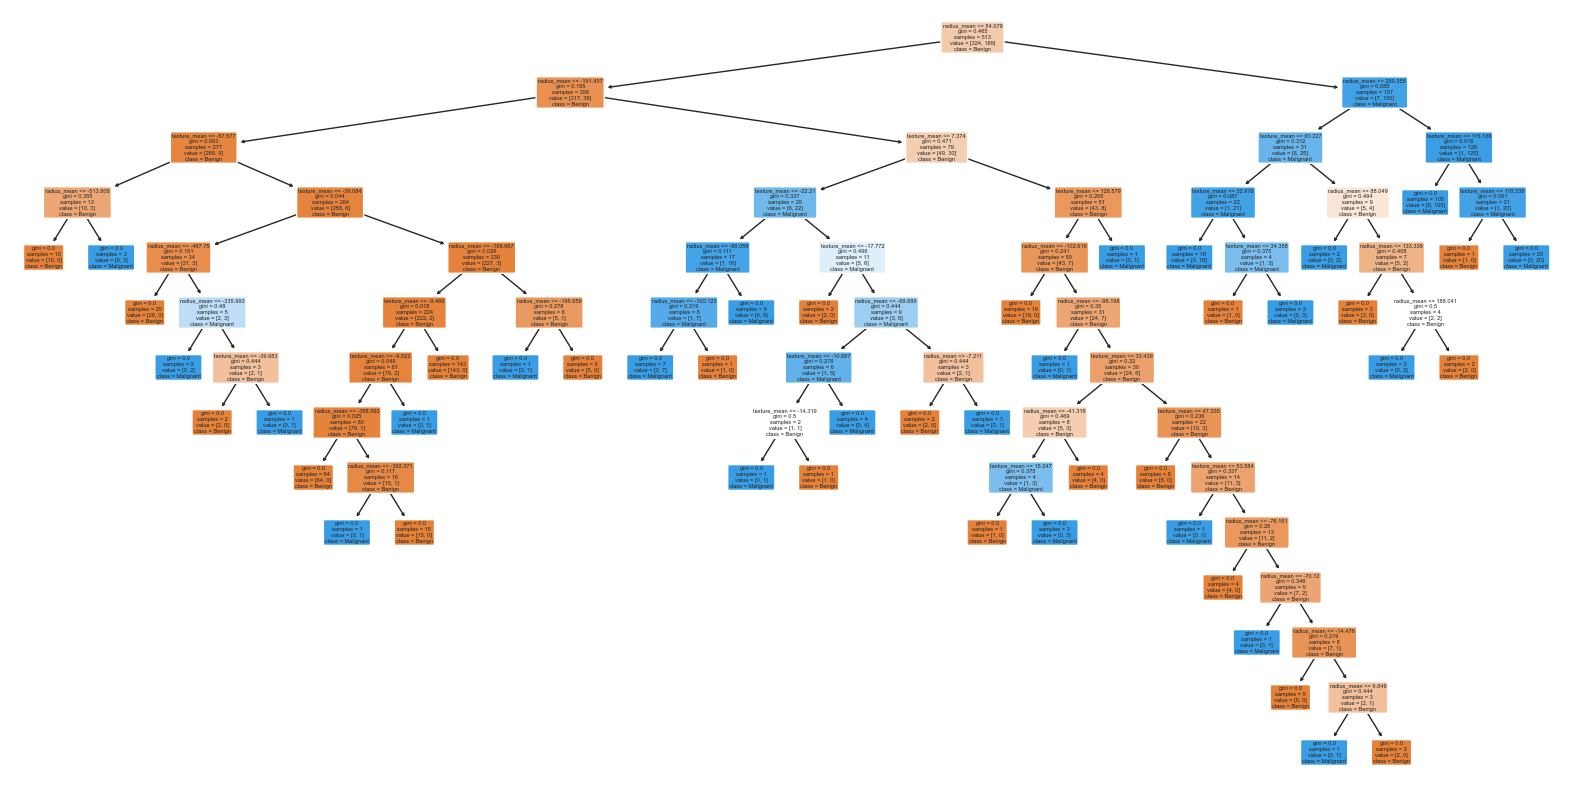

In [39]:
# Perform PCA on the training and test data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform PCA on the entire dataset
X_pca = pca.fit_transform(X)

# Defining the number of folds for k-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=69, shuffle=True) #K FOLD 

# Initializing the decision tree classifier
dtree = DecisionTreeClassifier(random_state=69)

# Performing k-fold cross-validation
for train_index, test_index in kf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fitting the model on the training data
    dtree.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = dtree.predict(X_test)
    
    #tree
    plt.figure(figsize = (20, 10))
    plot_tree(dtree, feature_names= X.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True, fontsize = None)
    plt.show()

### In our Binary classification tree, the orange rectangle stands for benign while the blue rectangle stands for malignant. Most of our binary classification trees has at least 12 levels.

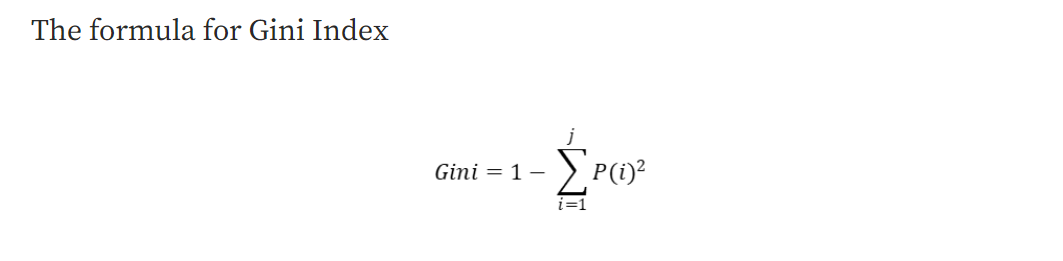

### As the levels increase, the gini value decreases to 0. 

### P(i) represents the ratio of Malignant cancer/Total no. of observations OR the ratio of benign/ Total number of observations. For example, if we have node with 4 Malignant, 0 Benign then our Gini will be 1-(4/4)^2 = 0, showing that there is no misclassification. In another example, if we have a node with 3 malignant and 1 benign, then our gini will be 1-(3/4)^2-(1/4)^2 = 0.375, which shows that there is some misclassification.

### As such, the lower the Gini Index, the lower the likelihood of misclassification. The decrease in Gini value as the level of binary tree increases shows that the likelihood of misclassification decreases.

## Confusion matrix for each fold using k fold


Fold number 1
True Positive(TP)  =  29
False Positive(FP) =  2
True Negative(TN)  =  25
False Negative(FN) =  1

Fold number 2
True Positive(TP)  =  18
False Positive(FP) =  1
True Negative(TN)  =  32
False Negative(FN) =  6

Fold number 3
True Positive(TP)  =  21
False Positive(FP) =  2
True Negative(TN)  =  32
False Negative(FN) =  2

Fold number 4
True Positive(TP)  =  18
False Positive(FP) =  3
True Negative(TN)  =  35
False Negative(FN) =  1

Fold number 5
True Positive(TP)  =  18
False Positive(FP) =  2
True Negative(TN)  =  36
False Negative(FN) =  1

Fold number 6
True Positive(TP)  =  14
False Positive(FP) =  7
True Negative(TN)  =  35
False Negative(FN) =  1

Fold number 7
True Positive(TP)  =  11
False Positive(FP) =  3
True Negative(TN)  =  38
False Negative(FN) =  5

Fold number 8
True Positive(TP)  =  22
False Positive(FP) =  5
True Negative(TN)  =  28
False Negative(FN) =  2

Fold number 9
True Positive(TP)  =  13
False Positive(FP) =  0
True Negative(TN)  =  38
False N

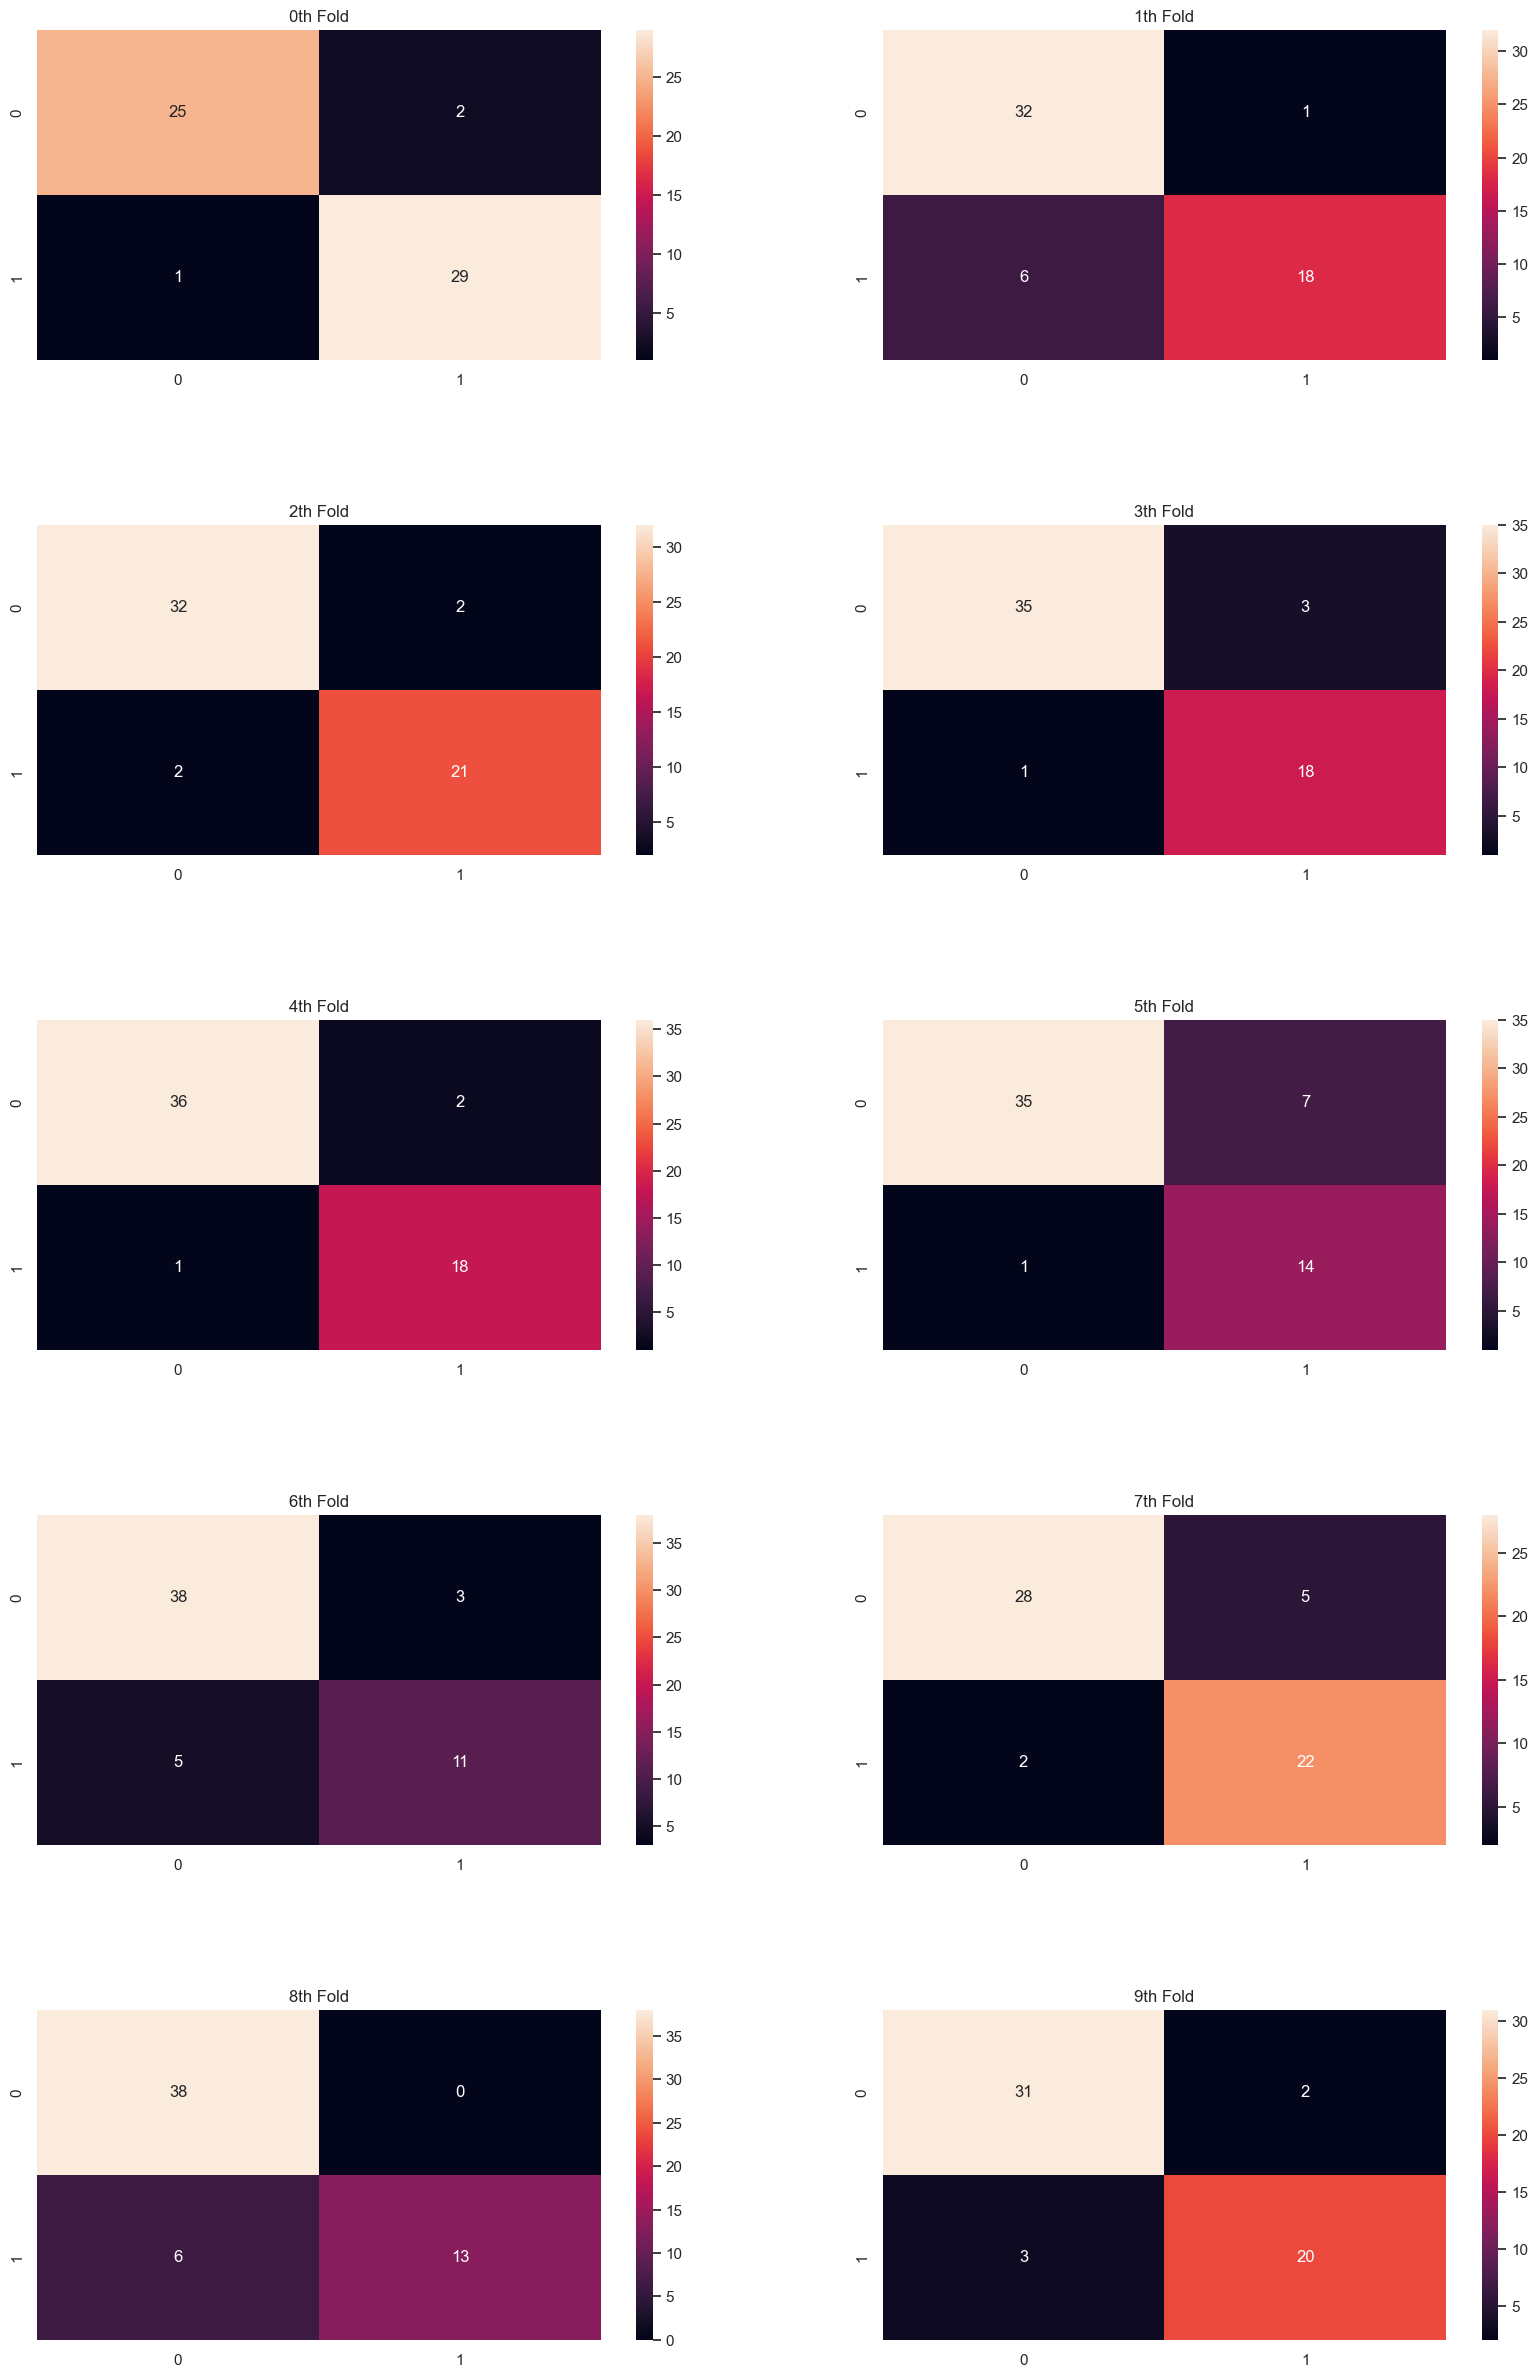

In [40]:
i = 0
j = 1
fig, axs = plt.subplots(5, 2, figsize=(20, 30))

for train_index, test_index in kf.split(X_pca, y): #K FOLD 
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fitting the model on the training data
    dtree.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = dtree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

    sb.heatmap(confusion_matrix(y_test, y_pred),
               annot=True, fmt=".0f", ax=axs[i//2, i%2])
    cnf_matrix1 = confusion_matrix(y_test, y_pred)

    TP1 = cnf_matrix1[1, 1]
    FP1 = cnf_matrix1[0, 1]
    TN1 = cnf_matrix1[0, 0]
    FN1 = cnf_matrix1[1, 0]
    TPR1 = TP1/(TP1+FN1)
    FPR1 = FP1/(FP1+TN1)

    axs[i//2, i%2].set_title(f"{i}th Fold", fontsize=12)

    print()
    print('Fold number', j)
    print('True Positive(TP)  = ', TP)
    print('False Positive(FP) = ', FP)
    print('True Negative(TN)  = ', TN)
    print('False Negative(FN) = ', FN)

    # Increase spacing between confusion matrices
    plt.subplots_adjust(hspace=0.5)

    i += 1
    j += 1


### What does TP, TN, FP, FN represent?

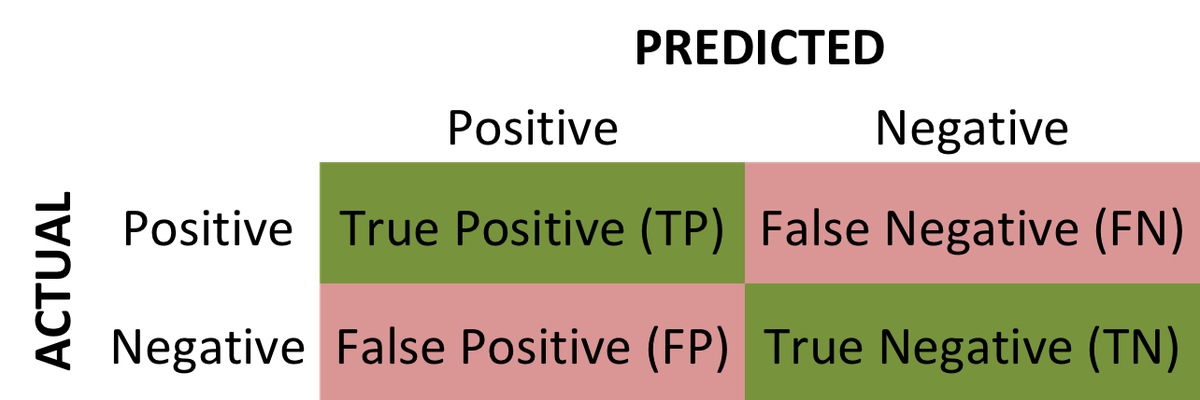

### What do the TP, TN, FP, FN stand for in the context of our dataset?

### True positive refers to when the patient has cancer and the model correctly predicts malignant. 

### True negative refers to when the patient does not have cancer and the model correctly predicts benign. 

### False positive refers to when the patient does not have cancer yet the model wrongly predicts that she has cancer (Malignant).

### False negative refers to when the patient has cancer yet the model wrongly predicts that she does not have cancer (Benign).

## Accuracy values for each fold using  k folds

In [41]:
i = 1

for train_index, test_index in kf.split(X_pca, y): #K FOLD 
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fitting the model on the training data
    dtree.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = dtree.predict(X_test)
    
    # Calculating accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(i, "Fold Accuracy score:", accuracy)
    i = i+1
    
# Calculating the average accuracy score
print( )
average_accuracy = np.mean(accuracy)
print("Average accuracy score:", average_accuracy)

1 Fold Accuracy score: 0.9473684210526315
2 Fold Accuracy score: 0.8771929824561403
3 Fold Accuracy score: 0.9298245614035088
4 Fold Accuracy score: 0.9298245614035088
5 Fold Accuracy score: 0.9473684210526315
6 Fold Accuracy score: 0.8596491228070176
7 Fold Accuracy score: 0.8596491228070176
8 Fold Accuracy score: 0.8771929824561403
9 Fold Accuracy score: 0.8947368421052632
10 Fold Accuracy score: 0.9107142857142857

Average accuracy score: 0.9107142857142857


### The classification accuracy value shows how accurate the binary classification tree. The higher the classification accuracy value, the more accurate the tree classifies the data points.

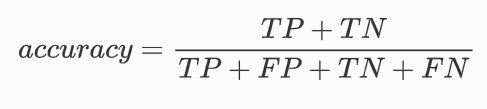

### The classification accuracy values are derived from the formula shown above. The average accuracy score is derived from finding the average of all the classification accuracy values. 

# Using Stratified K-Fold for Binary Tree Classification

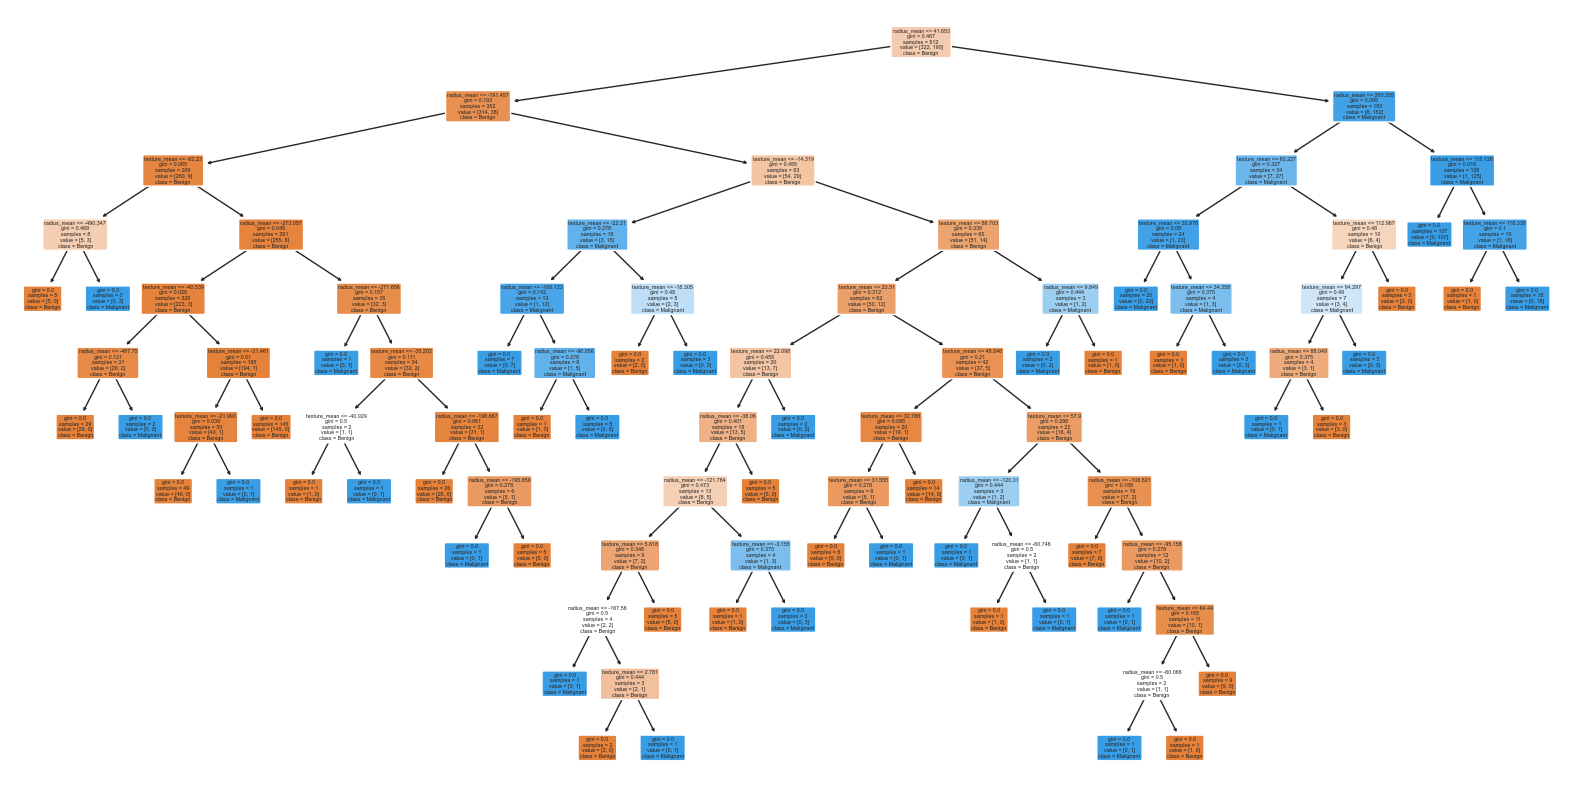

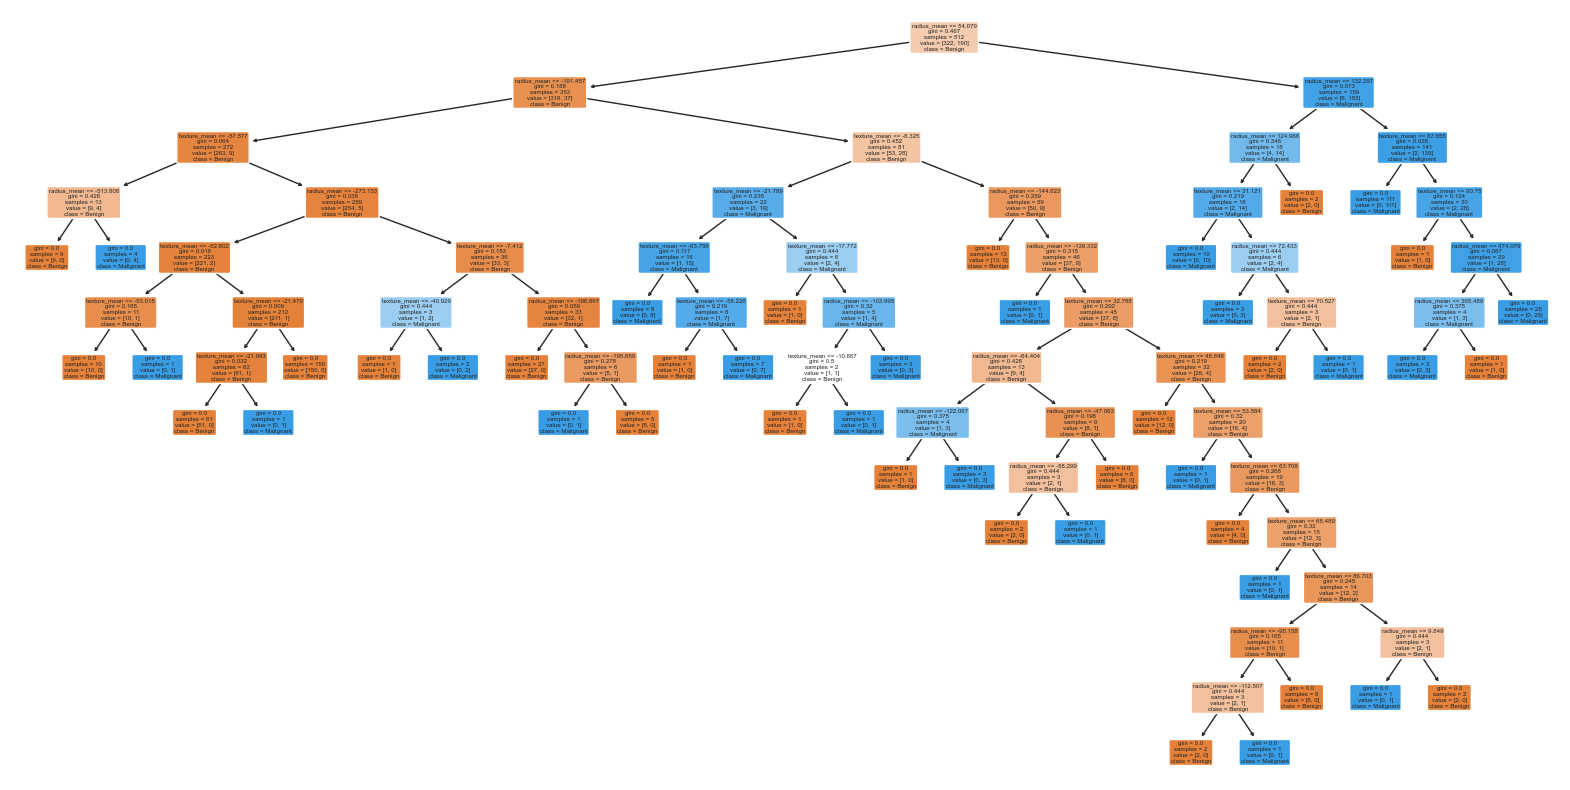

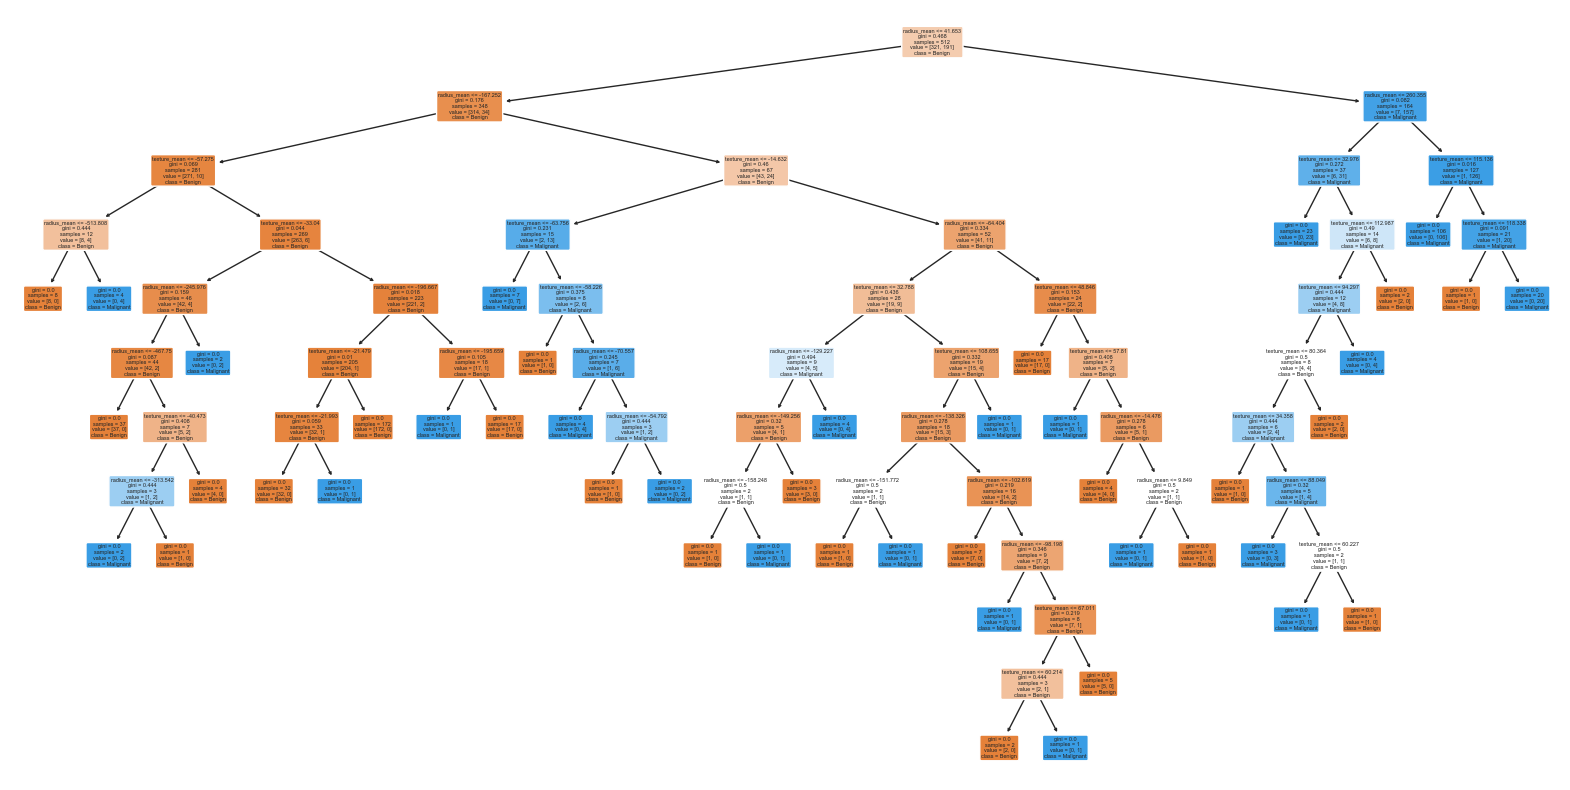

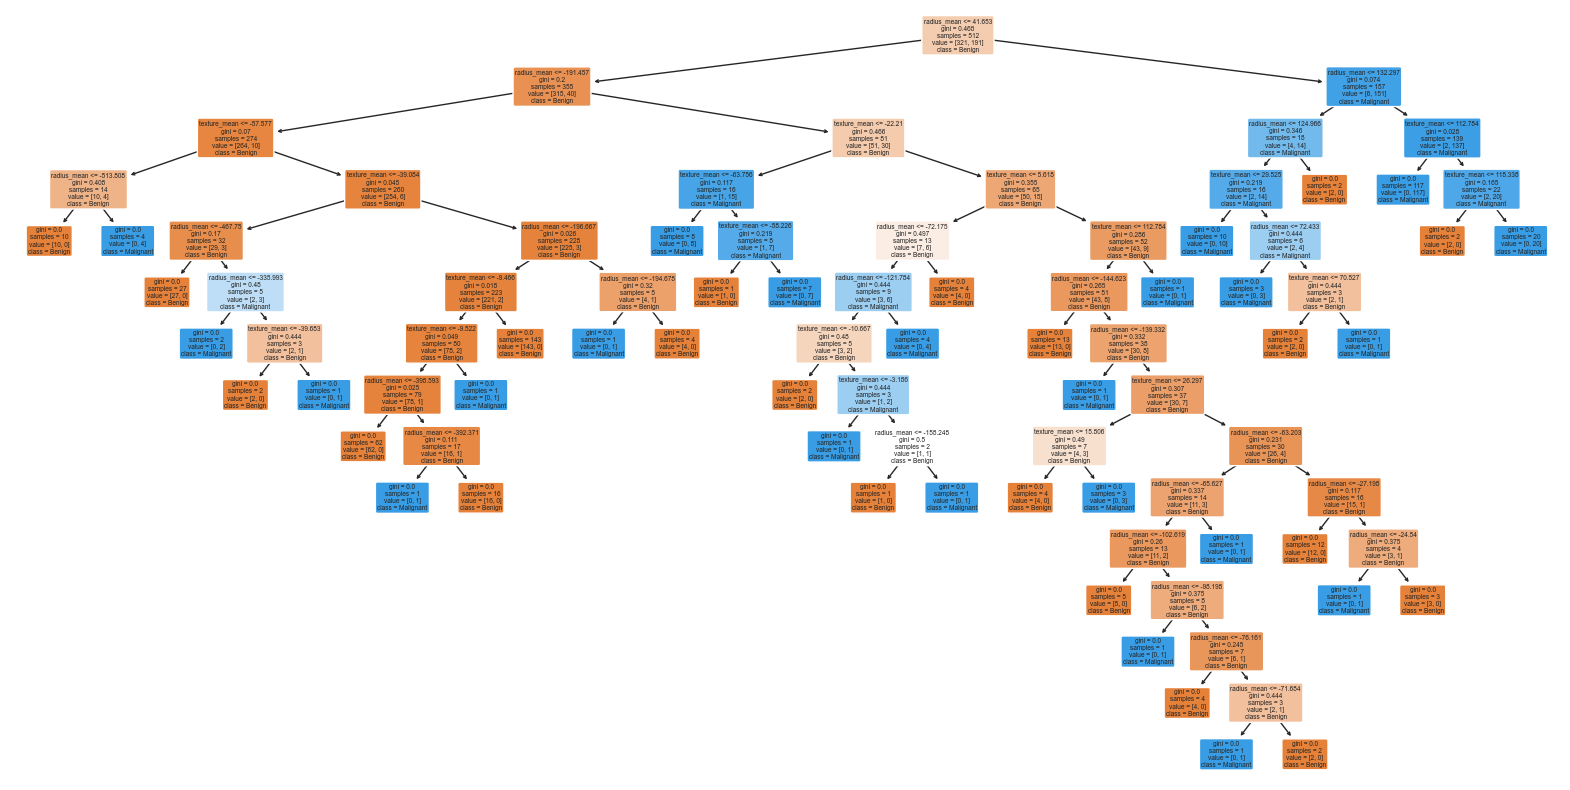

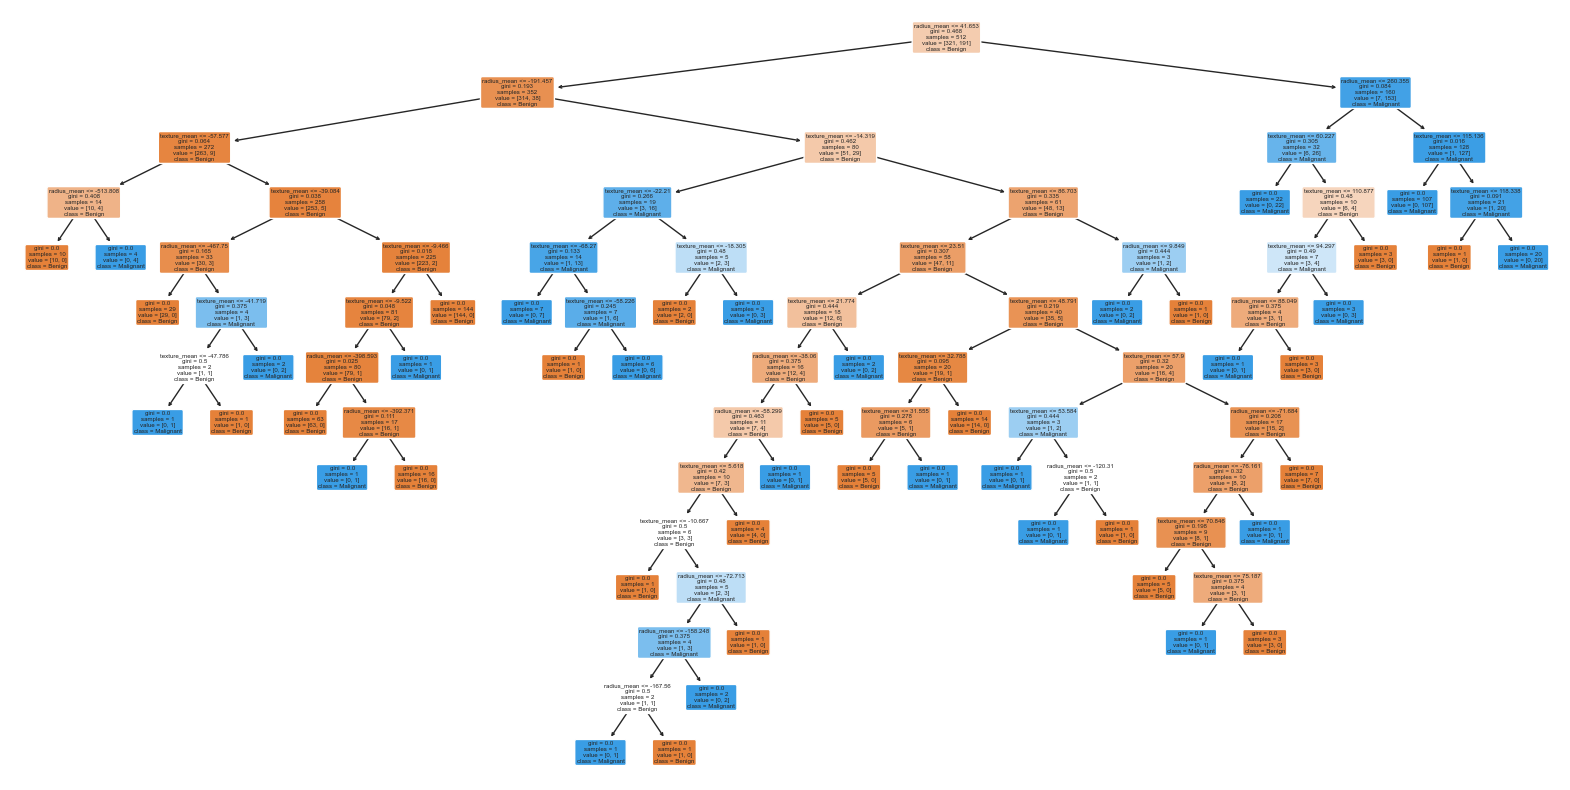

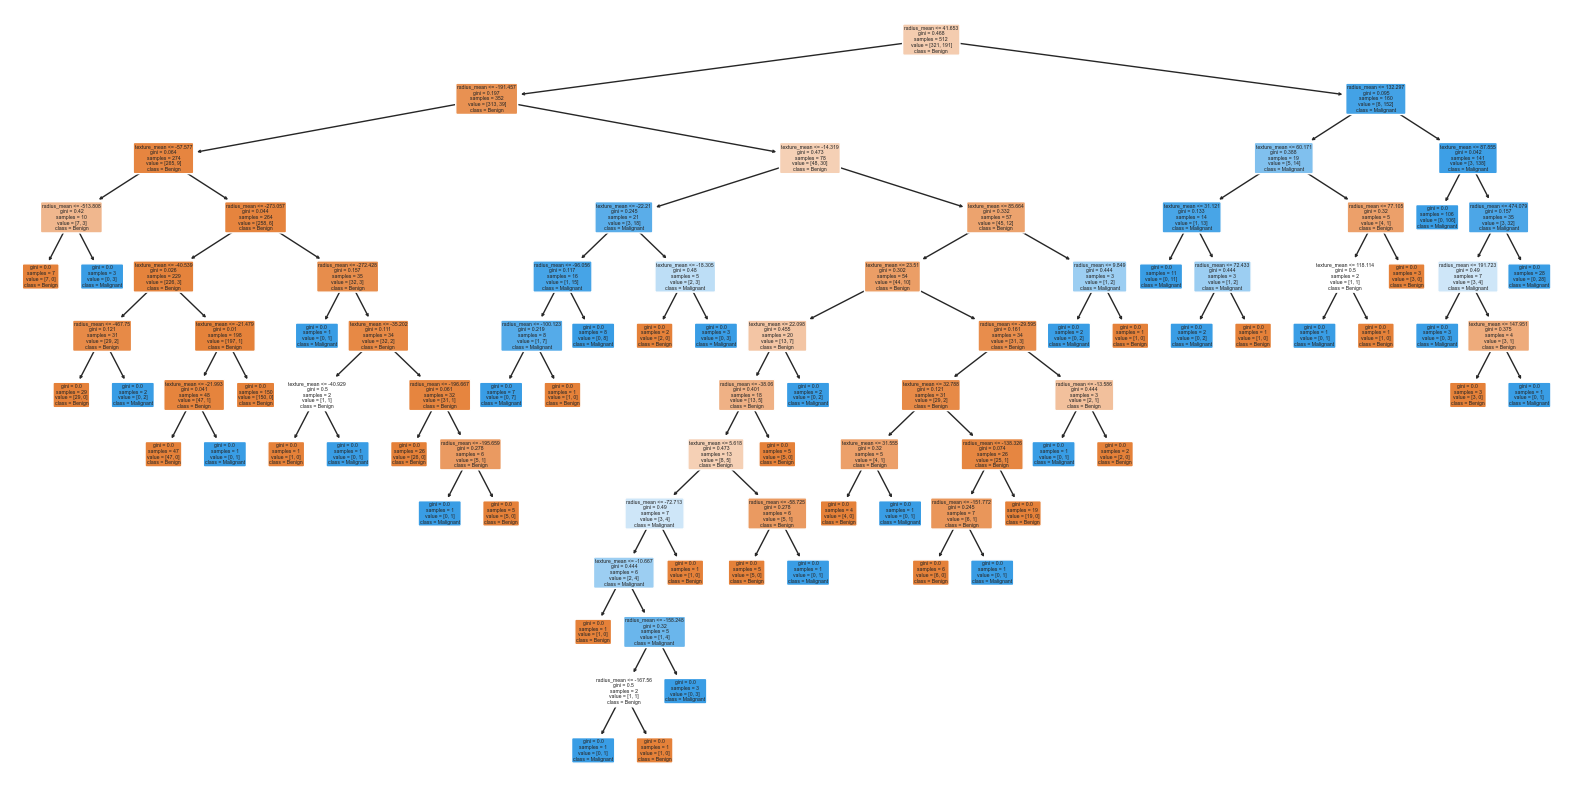

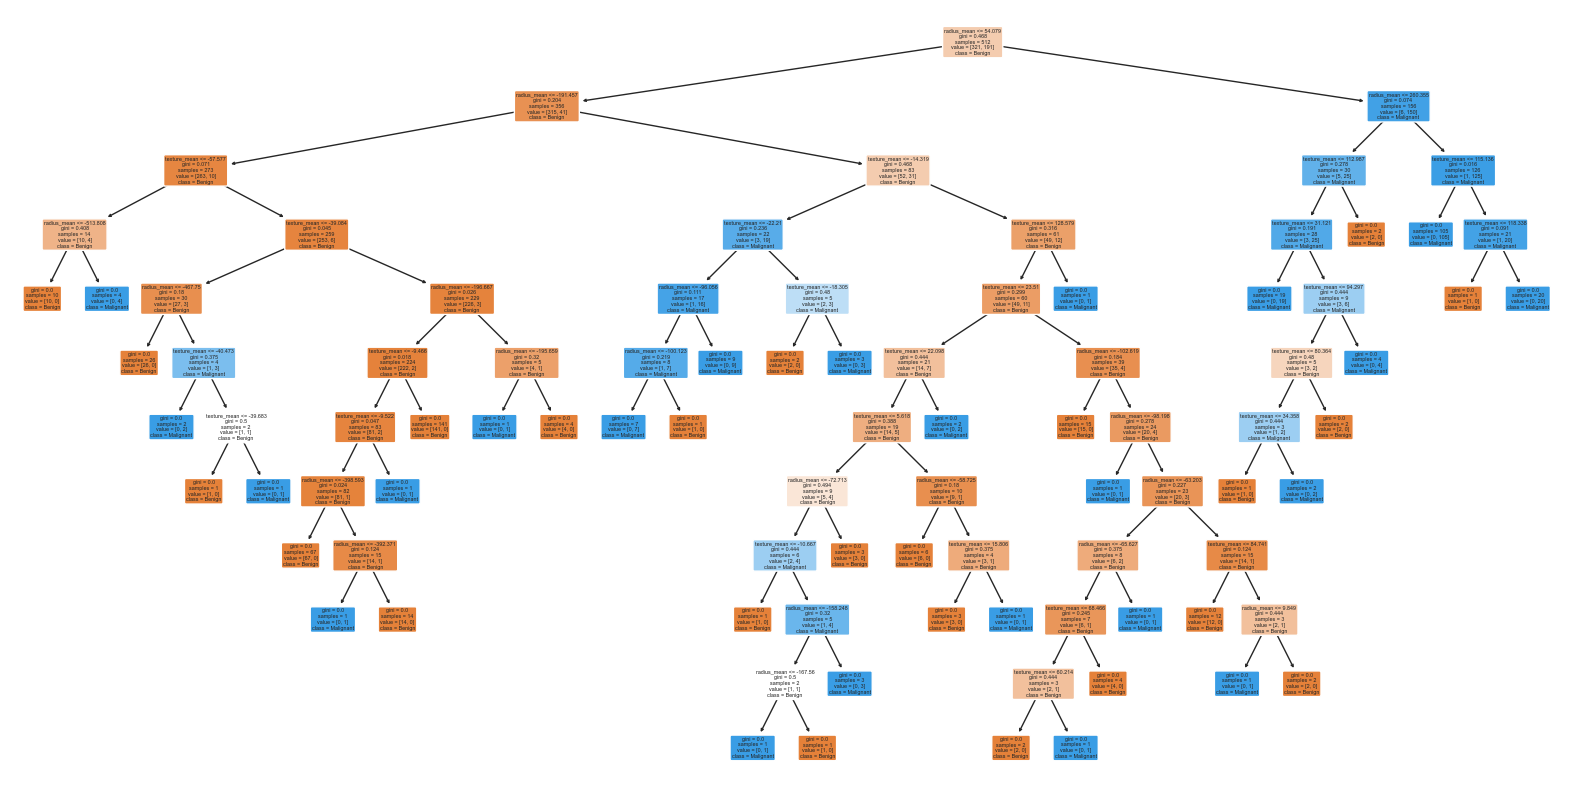

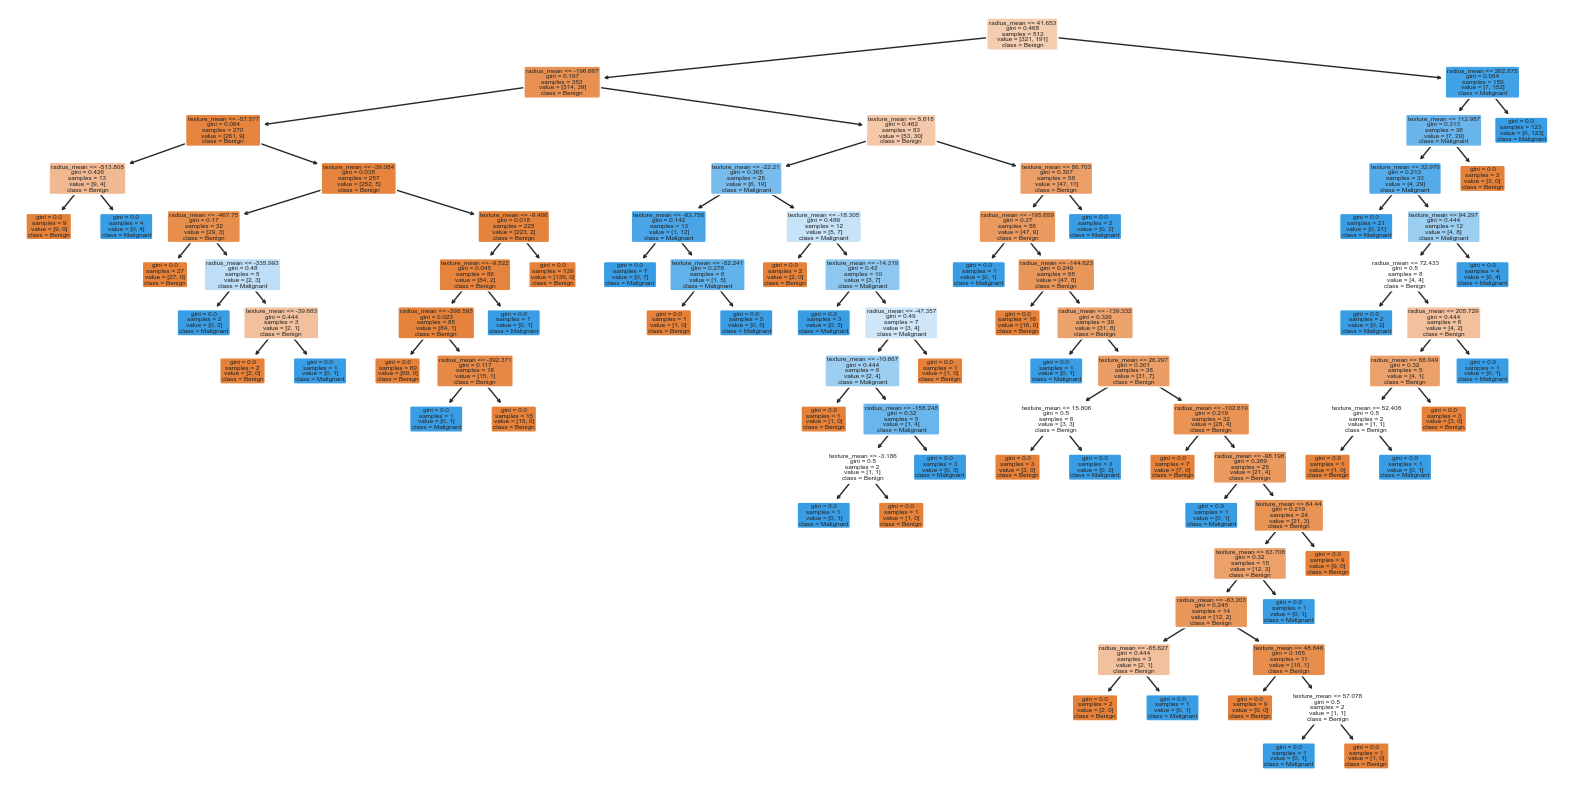

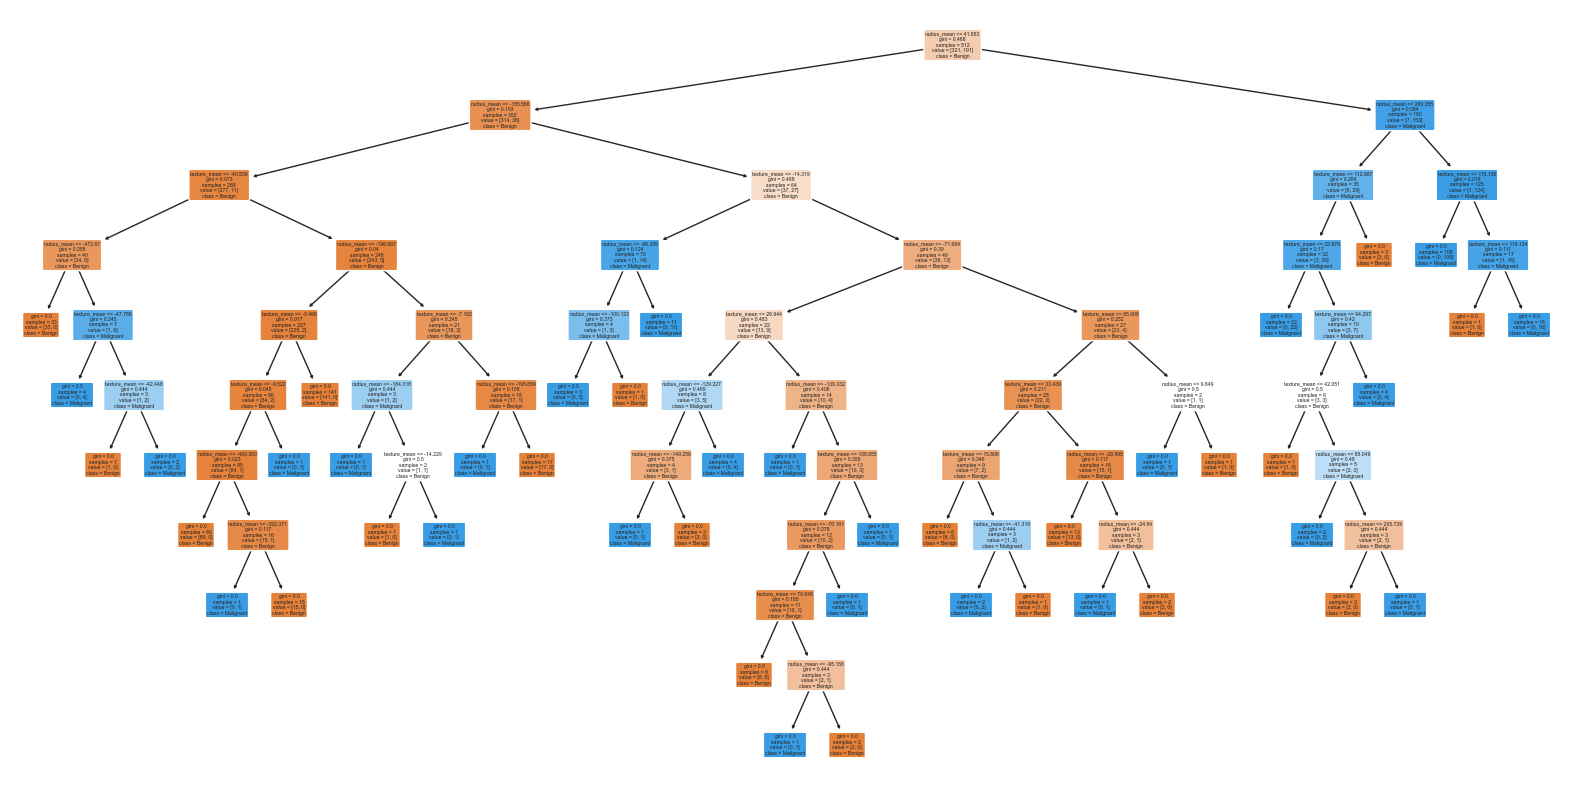

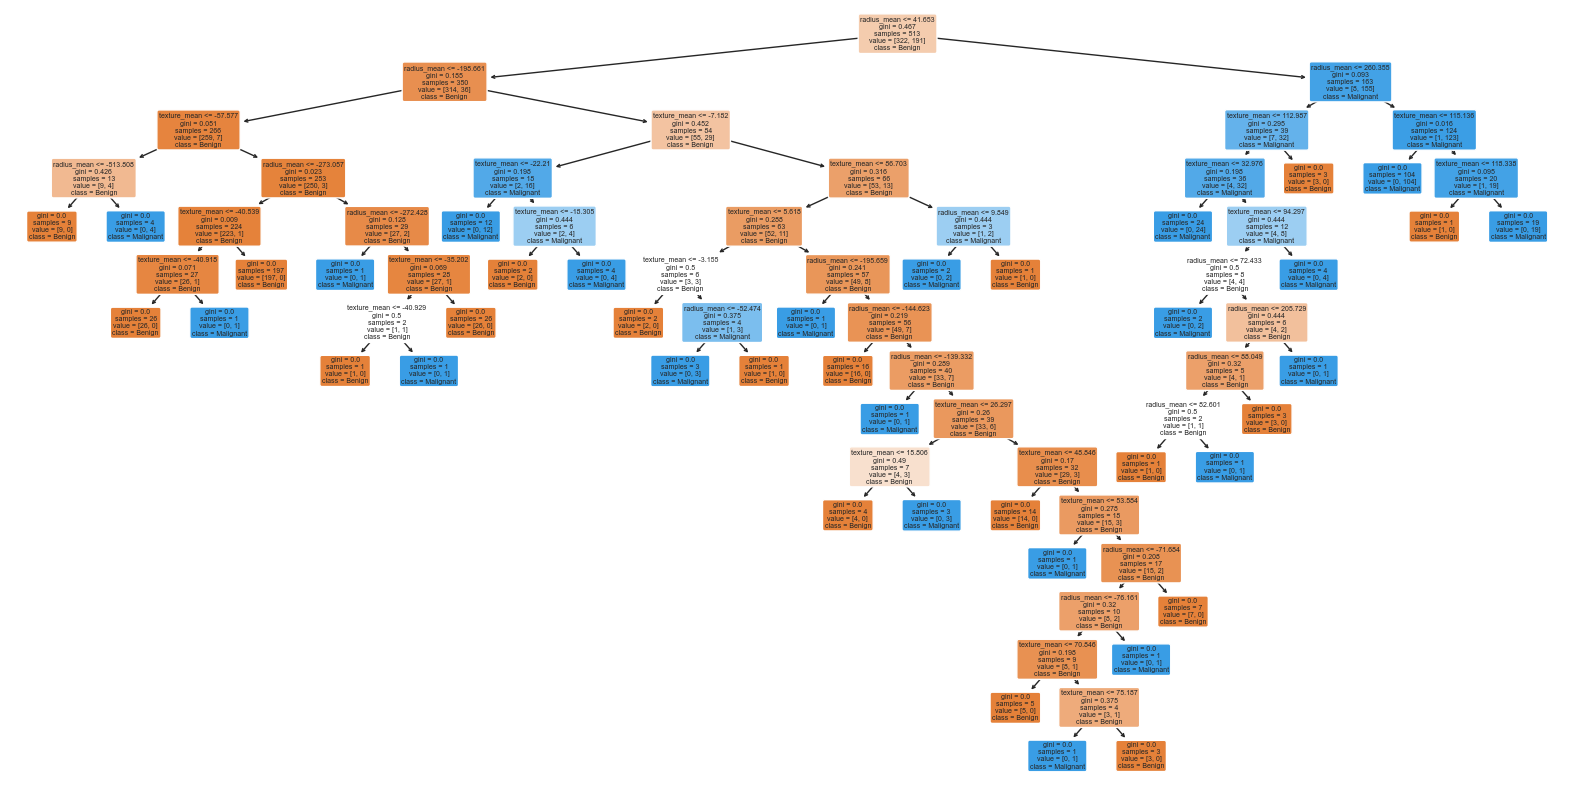

In [42]:
# Perform PCA on the training and test data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform PCA on the entire dataset
X_pca = pca.fit_transform(X)

# Defining the number of folds for k-fold cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, random_state=69, shuffle=True) # stratified K FOLD 

# Initializing the decision tree classifier
dtree = DecisionTreeClassifier(random_state=69)

# Performing k-fold cross-validation
for train_index, test_index in skf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fitting the model on the training data
    dtree.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = dtree.predict(X_test)
    
    #tree
    plt.figure(figsize = (20, 10))
    plot_tree(dtree, feature_names= X.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True, fontsize = None)
    plt.show()

### In our Binary classification tree, the orange rectangle stands for benign while the blue rectangle stands for malignant. Most of our binary classification trees has at least 12 levels.

## Confusion matrix for each fold in stratified k fold


Fold number 1
True Positive(TP)  =  21
False Positive(FP) =  2
True Negative(TN)  =  33
False Negative(FN) =  1

Fold number 2
True Positive(TP)  =  18
False Positive(FP) =  3
True Negative(TN)  =  32
False Negative(FN) =  4

Fold number 3
True Positive(TP)  =  18
False Positive(FP) =  0
True Negative(TN)  =  36
False Negative(FN) =  3

Fold number 4
True Positive(TP)  =  19
False Positive(FP) =  3
True Negative(TN)  =  33
False Negative(FN) =  2

Fold number 5
True Positive(TP)  =  18
False Positive(FP) =  2
True Negative(TN)  =  34
False Negative(FN) =  3

Fold number 6
True Positive(TP)  =  18
False Positive(FP) =  2
True Negative(TN)  =  34
False Negative(FN) =  3

Fold number 7
True Positive(TP)  =  17
False Positive(FP) =  2
True Negative(TN)  =  34
False Negative(FN) =  4

Fold number 8
True Positive(TP)  =  20
False Positive(FP) =  4
True Negative(TN)  =  32
False Negative(FN) =  1

Fold number 9
True Positive(TP)  =  17
False Positive(FP) =  2
True Negative(TN)  =  34
False N

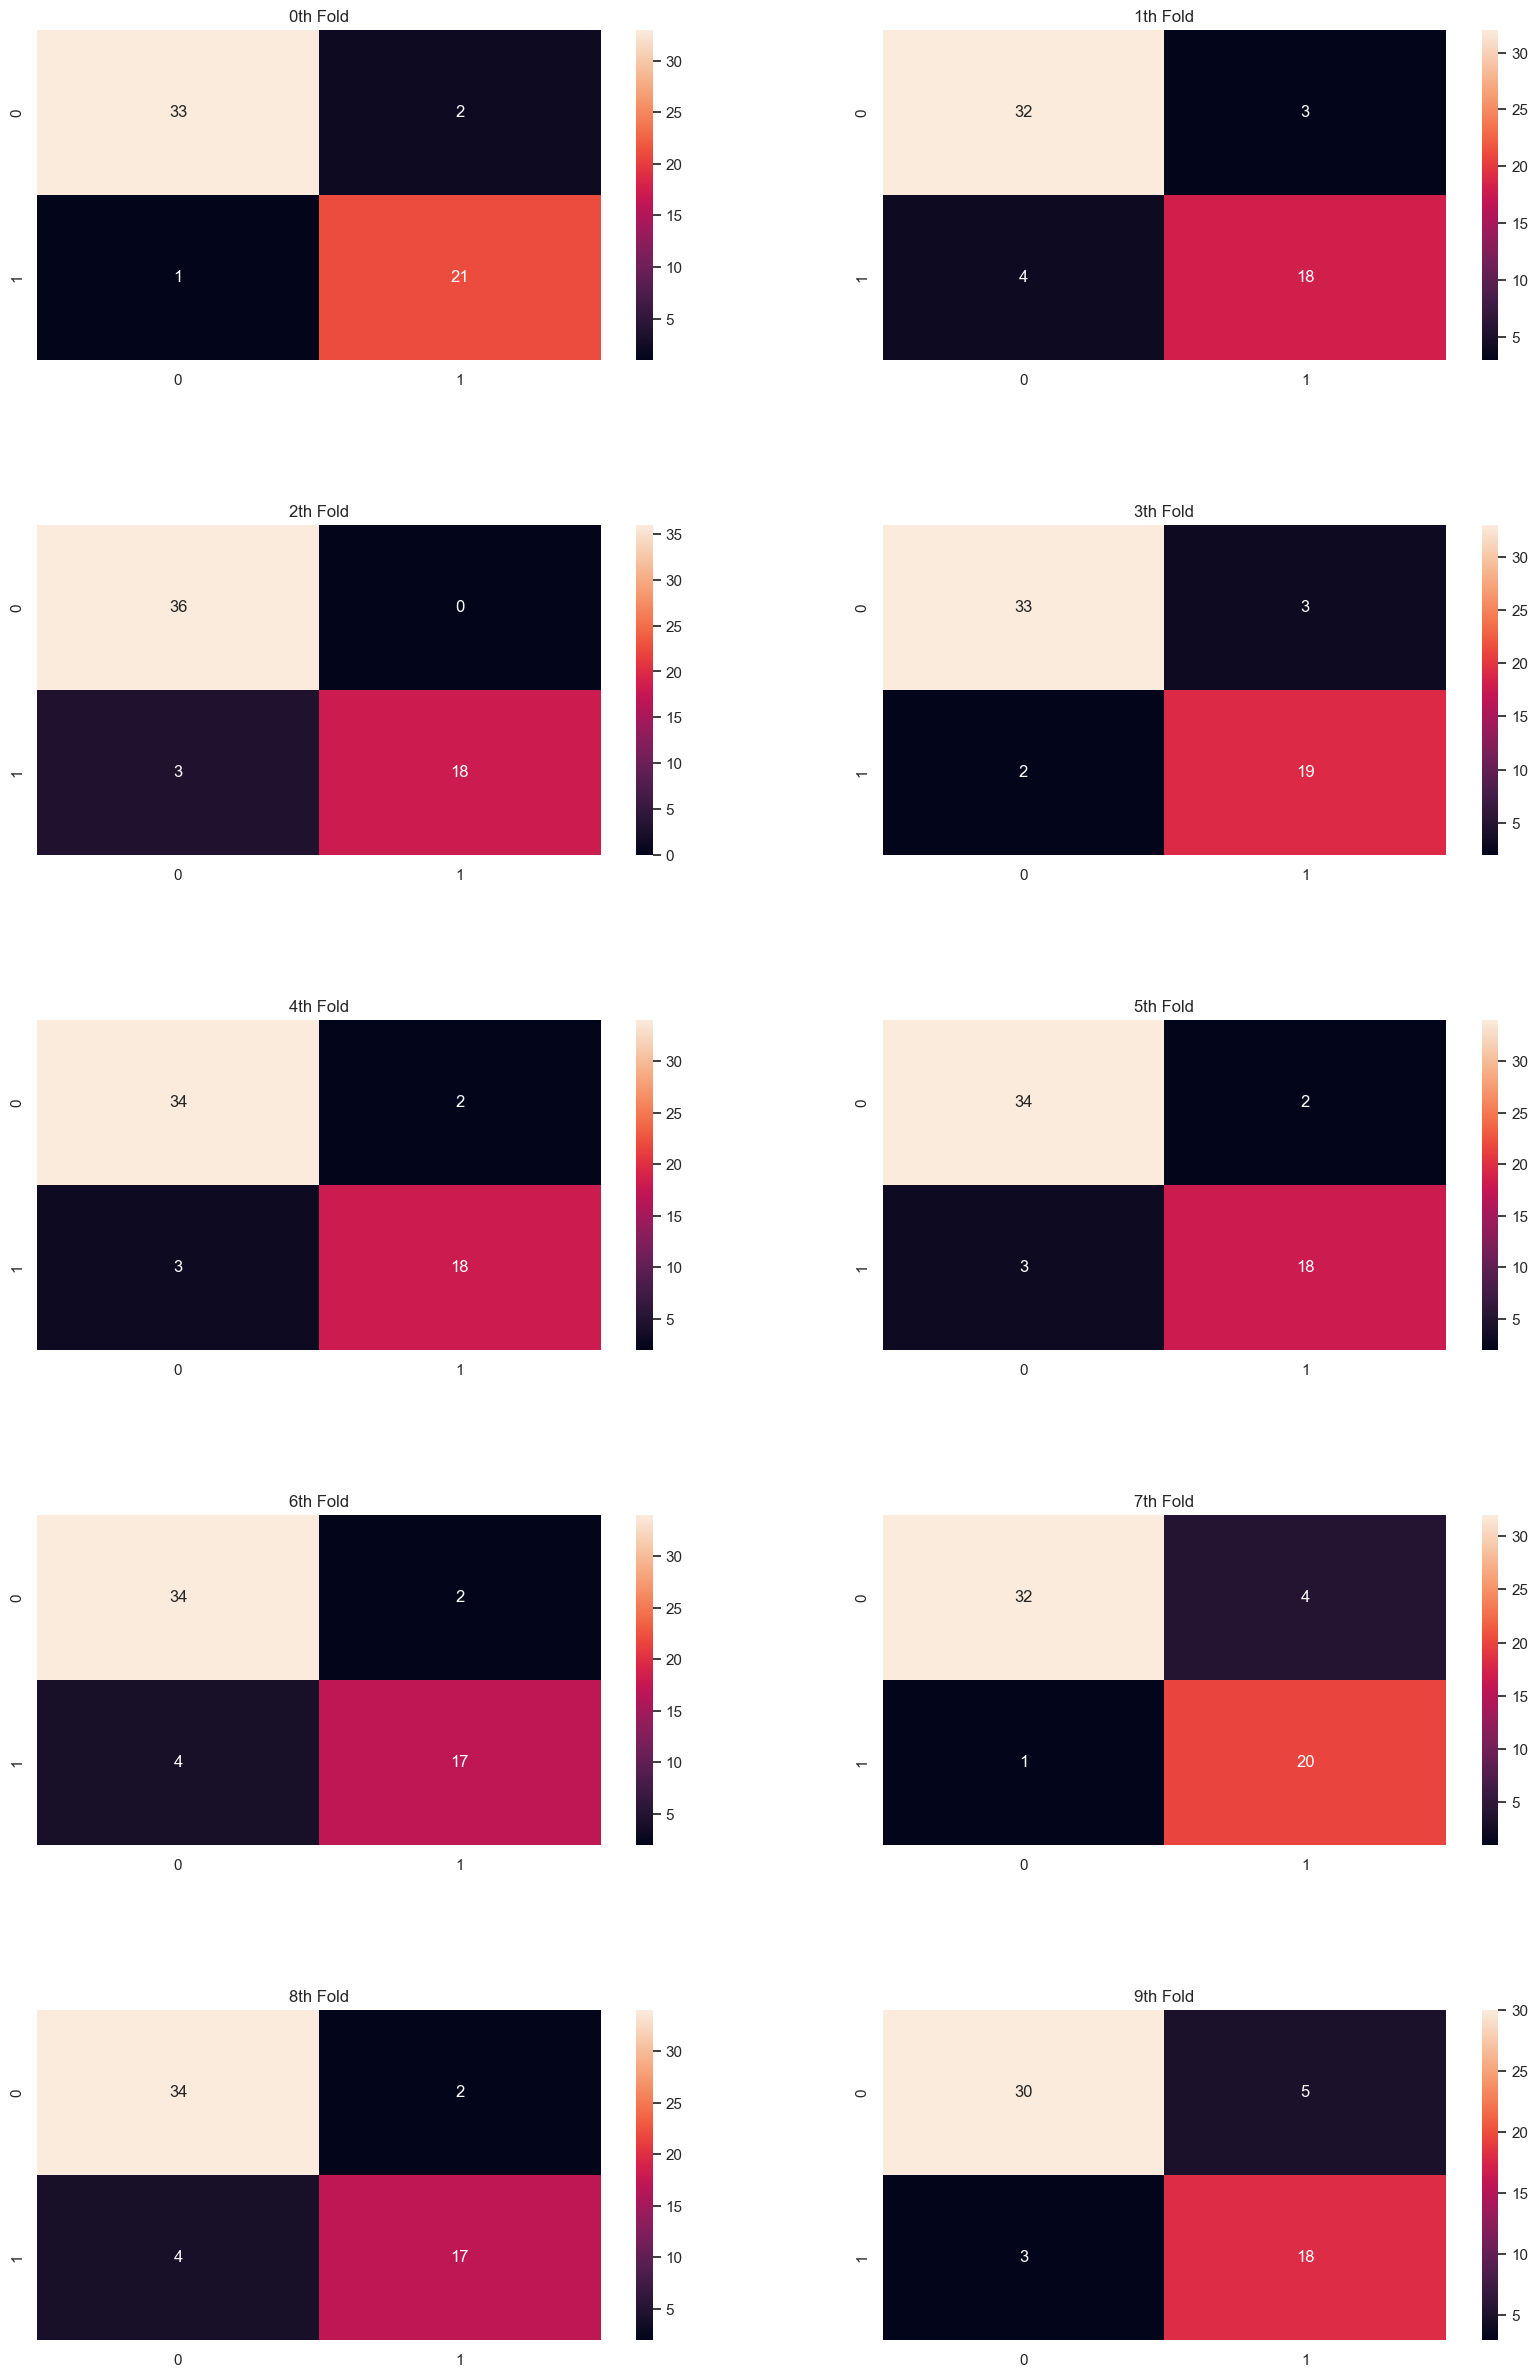

In [43]:
i = 0
j = 1
fig, axs = plt.subplots(5, 2, figsize=(20, 30))

for train_index, test_index in skf.split(X_pca, y): # stratified K FOLD 
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fitting the model on the training data
    dtree.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = dtree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

    sb.heatmap(confusion_matrix(y_test, y_pred),
               annot=True, fmt=".0f", ax=axs[i//2, i%2])
    cnf_matrix1 = confusion_matrix(y_test, y_pred)

    TP1 = cnf_matrix1[1, 1]
    FP1 = cnf_matrix1[0, 1]
    TN1 = cnf_matrix1[0, 0]
    FN1 = cnf_matrix1[1, 0]
    TPR1 = TP1/(TP1+FN1)
    FPR1 = FP1/(FP1+TN1)

    axs[i//2, i%2].set_title(f"{i}th Fold", fontsize=12)

    print()
    print('Fold number', j)
    print('True Positive(TP)  = ', TP)
    print('False Positive(FP) = ', FP)
    print('True Negative(TN)  = ', TN)
    print('False Negative(FN) = ', FN)

    # Increase spacing between confusion matrices
    plt.subplots_adjust(hspace=0.5)

    i += 1
    j += 1


## Accuracy values for each fold using stratified k folds

In [44]:
i = 1

for train_index, test_index in skf.split(X_pca, y): # stratified K FOLD 
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fitting the model on the training data
    dtree.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = dtree.predict(X_test)
    
    # Calculating accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(i,"Fold Accuracy score:", accuracy)
    i = i+1
    
# Calculating the average accuracy score
print( )
average_accuracy = np.mean(accuracy)
print("Average accuracy score:", average_accuracy)

1 Fold Accuracy score: 0.9473684210526315
2 Fold Accuracy score: 0.8771929824561403
3 Fold Accuracy score: 0.9473684210526315
4 Fold Accuracy score: 0.9122807017543859
5 Fold Accuracy score: 0.9122807017543859
6 Fold Accuracy score: 0.9122807017543859
7 Fold Accuracy score: 0.8947368421052632
8 Fold Accuracy score: 0.9122807017543859
9 Fold Accuracy score: 0.8947368421052632
10 Fold Accuracy score: 0.8571428571428571

Average accuracy score: 0.8571428571428571


### The classification accuracy value shows how accurate the binary classification tree. The higher the classification accuracy value, the more accurate the tree classifies the data points.